In [1]:
import lightgbm
from sklearn import * 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np 
import pandas as pd 
import os 
import re 
import time
from scipy import interp

In [3]:
time_ = time.time()

train_data = pd.read_csv("data/train.csv")
test_data  = pd.read_csv("data/test.csv")

print("Time passed {}".format((time.time()  - time_ )))

Time passed 16.157135486602783


In [20]:
tr_ix = train_data.index[train_data.target == 1]
tr_en = [el for el in train_data.index if el not in tr_ix]
for col in train_data.columns[3:]:
    df = train_data.loc[:, col]
    df_one = df[tr_ix.values]
    df_zero = df[tr_en]
    fig = plt.figure(figsize = (8, 8))
    plt.title('Var: {}'.format(col))
    #plt.hist(df )
    plt.hist(df_one, alpha = 0.2, color = 'blue', label = 'succes')
    plt.hist(df_zero, alpha = 0.2, color = 'red', label = 'falses')
    plt.hist(test_data.loc[:, col], alpha = 0.4, color = 'green', label = 'test data')
    plt.legend(loc = 'best')
    plt.savefig('.\plots\hists\{}.png'.format(col))
    #plt.show()
    plt.close()

In [9]:
!mkdir -p plots\hists\test

A subdirectory or file -p already exists.
Error occurred while processing: -p.


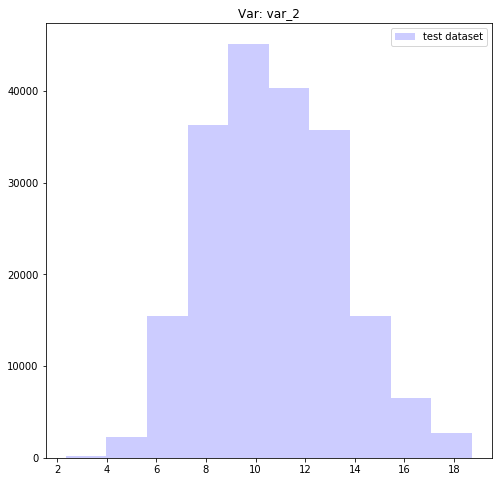

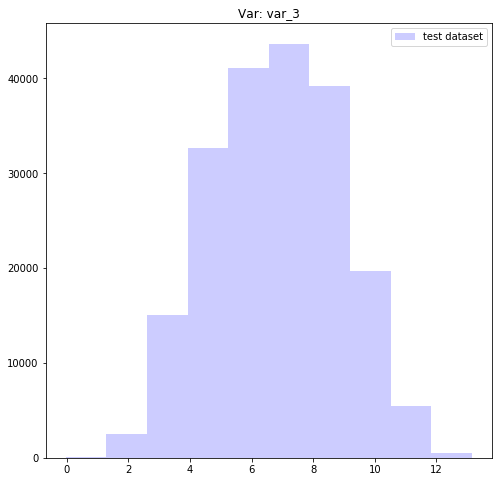

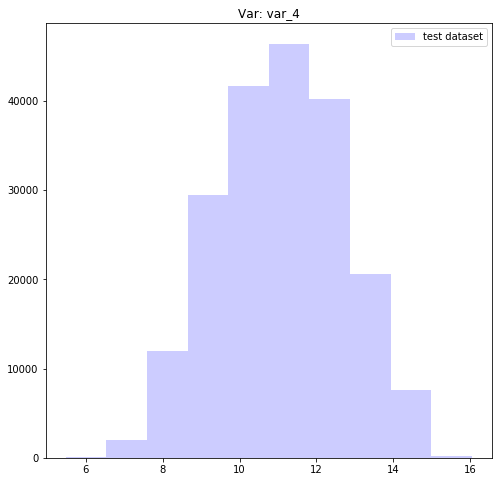

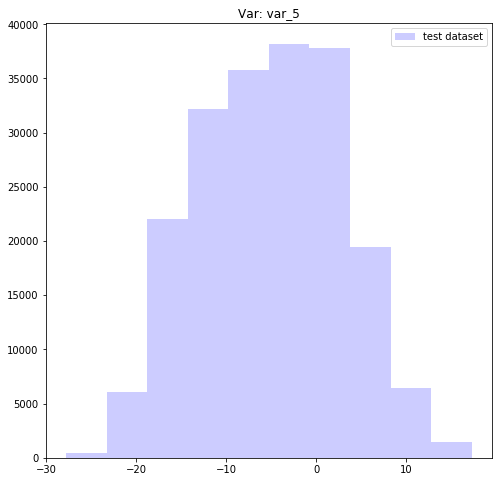

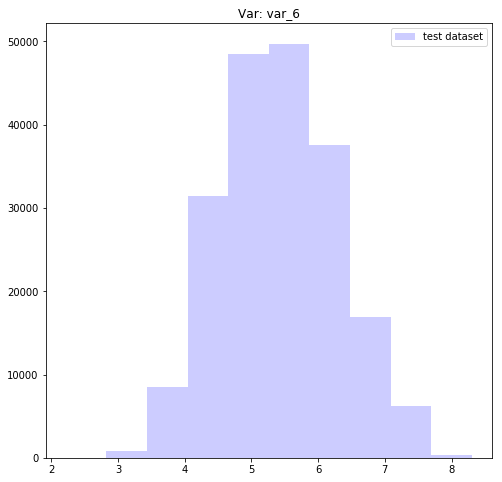

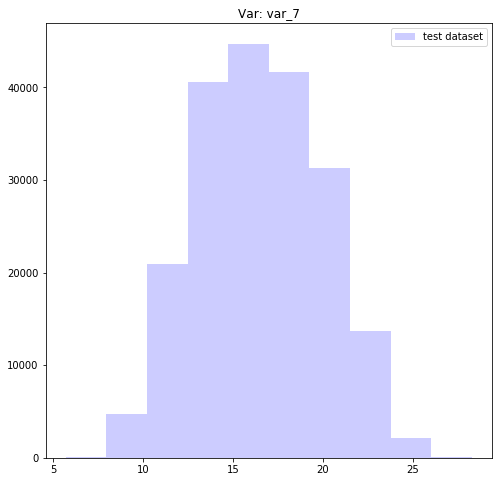

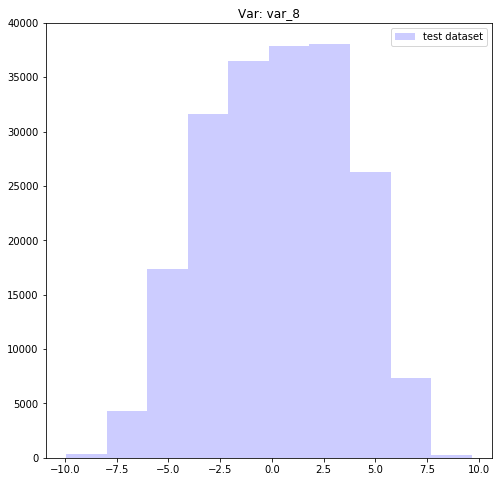

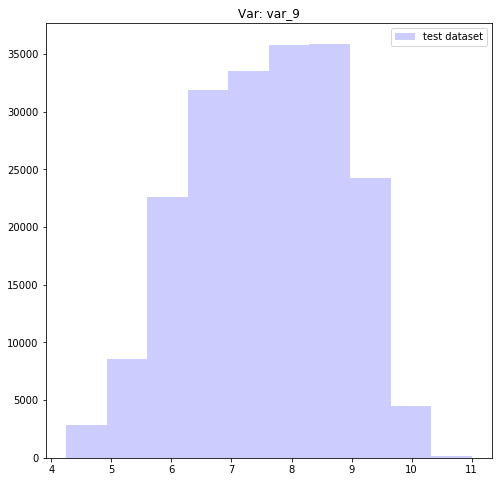

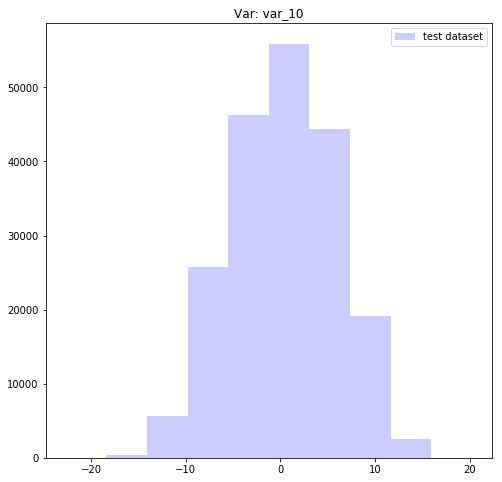

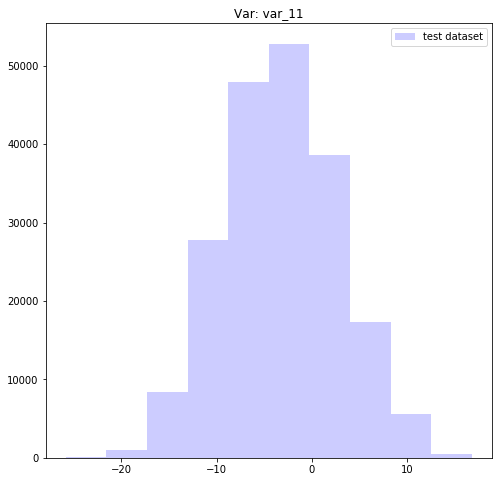

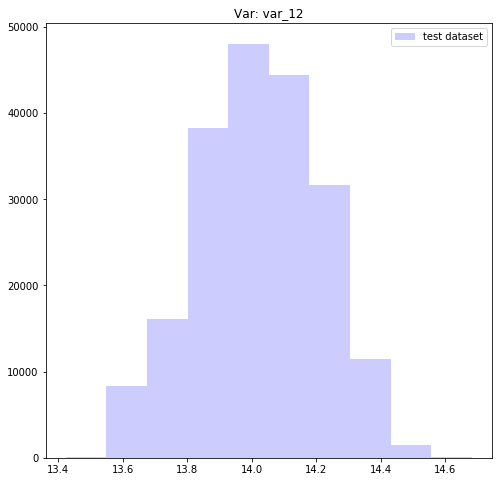

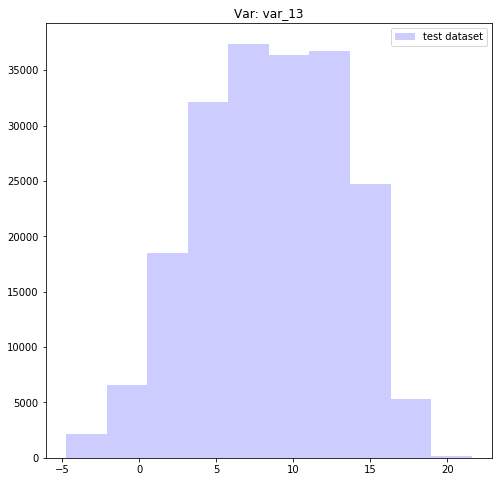

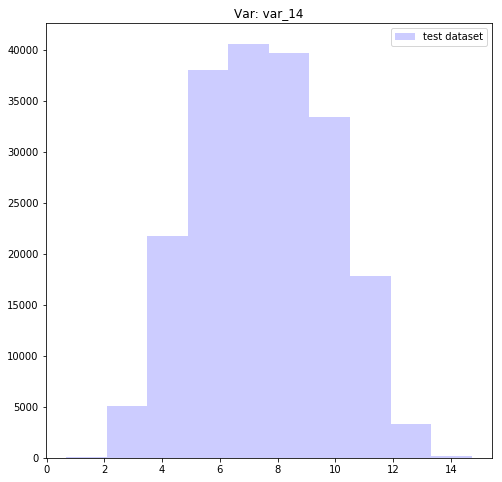

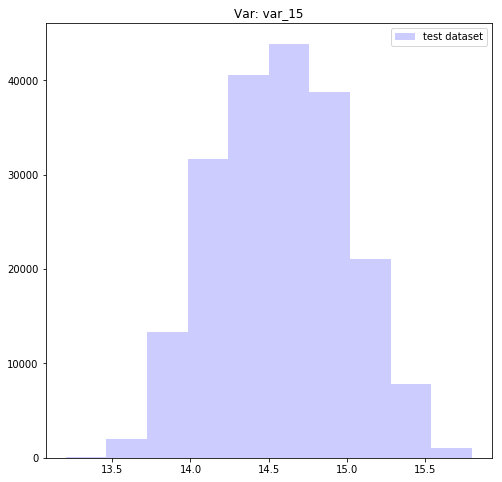

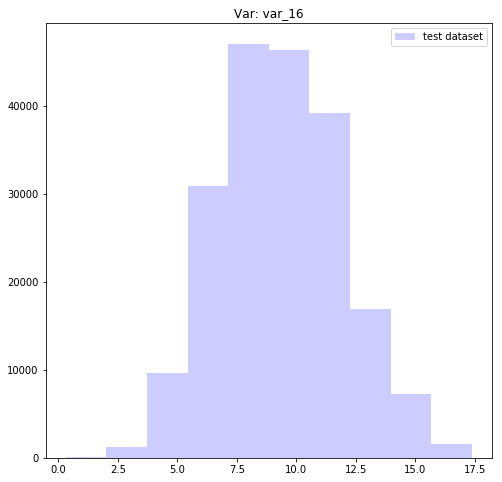

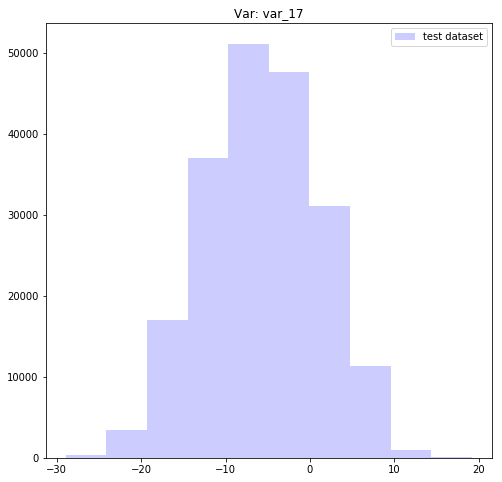

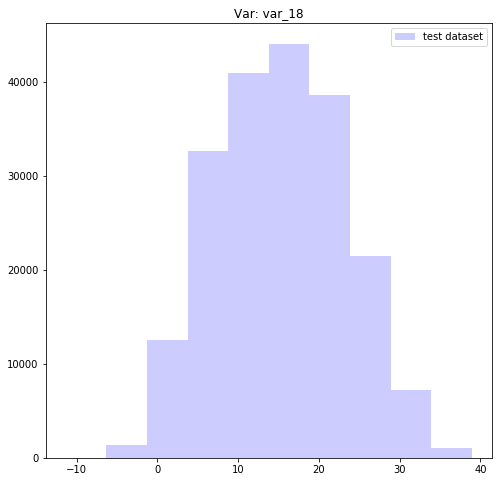

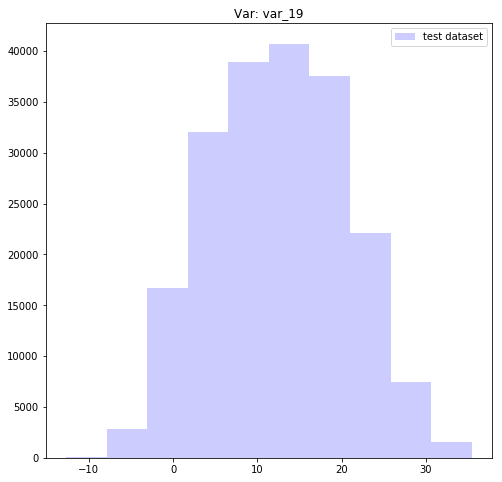

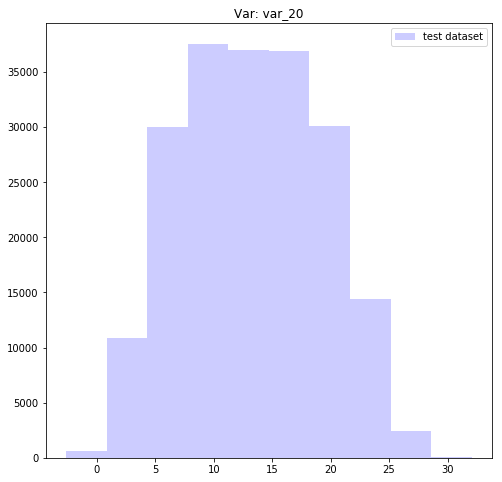

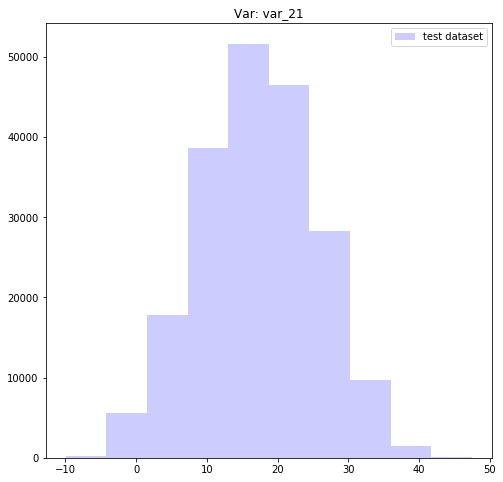

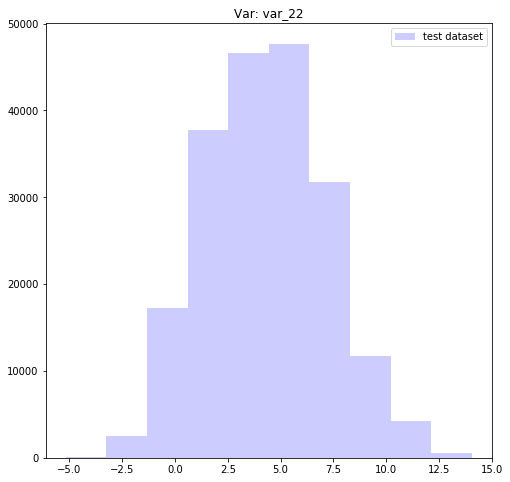

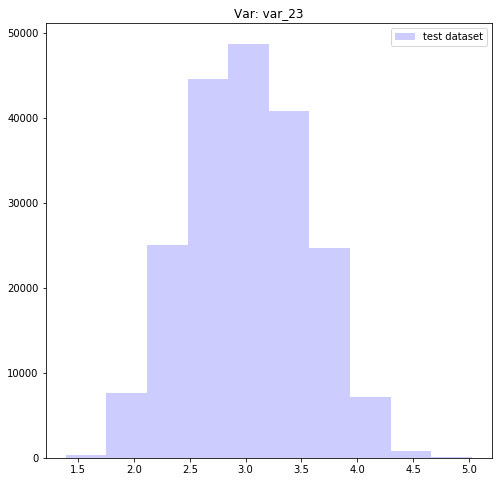

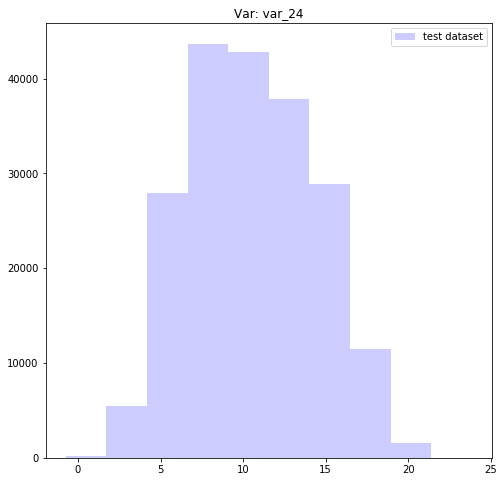

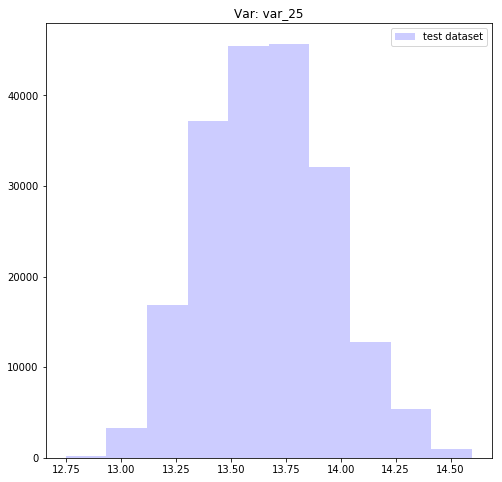

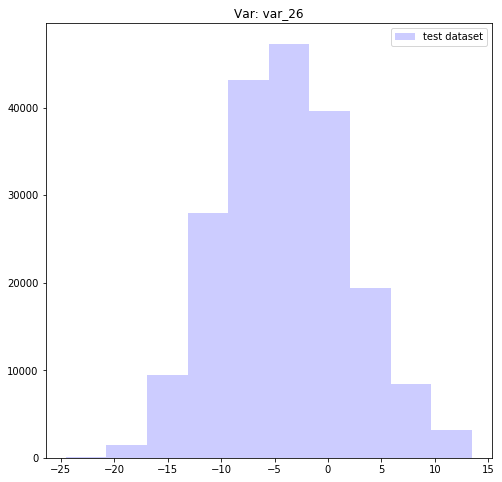

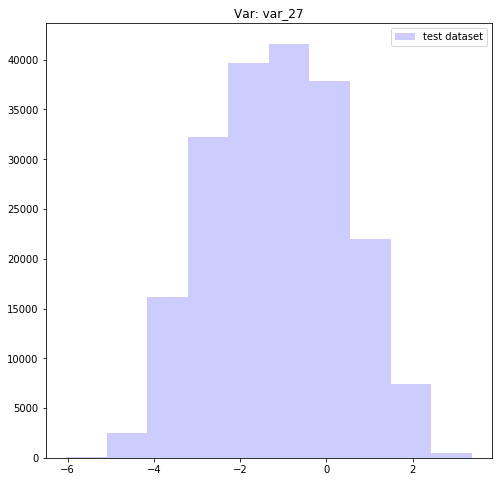

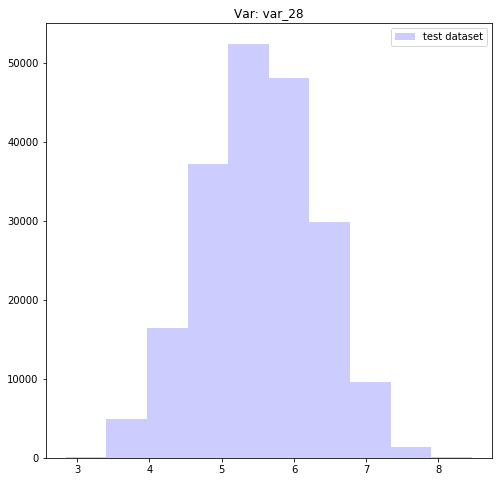

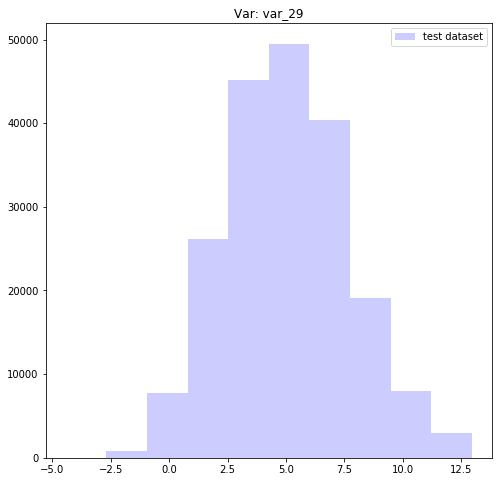

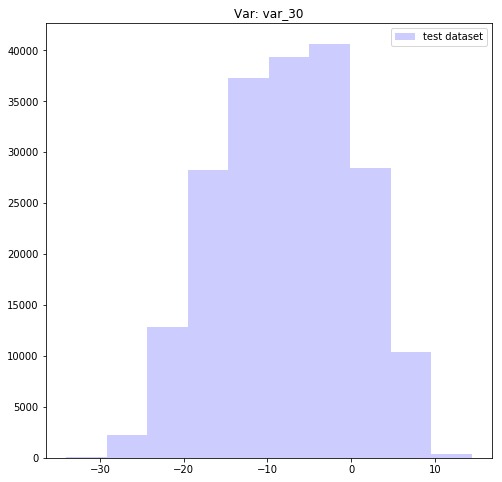

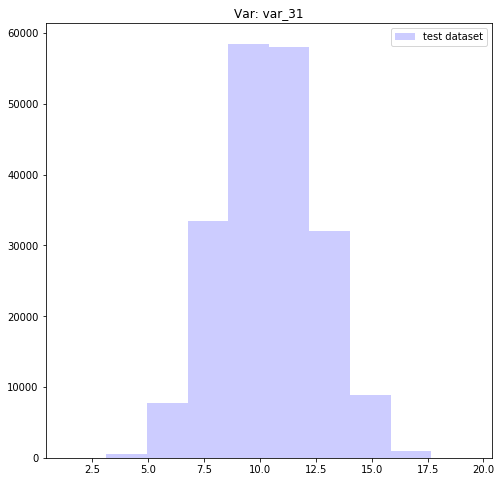

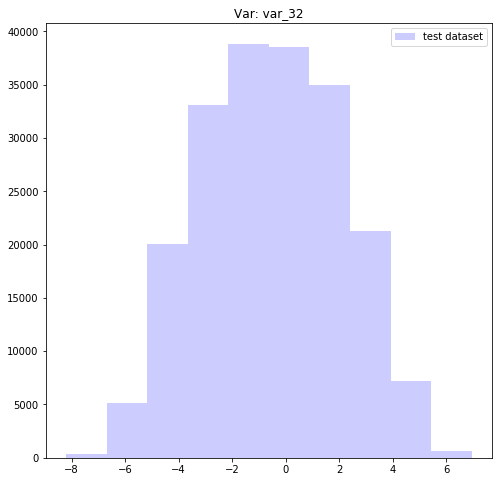

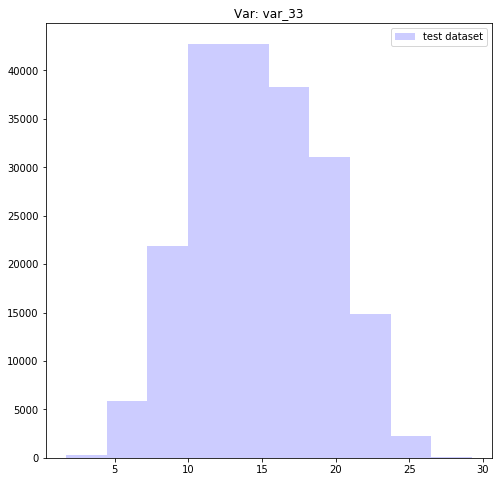

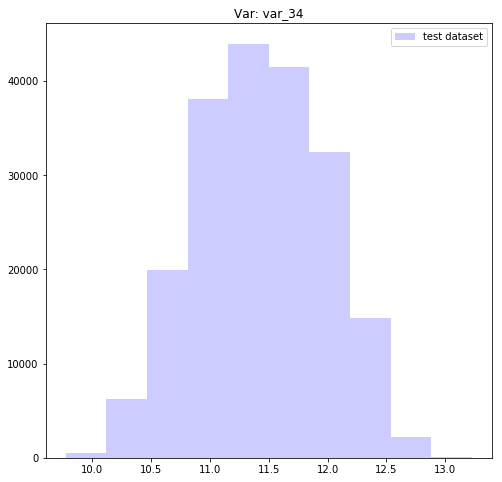

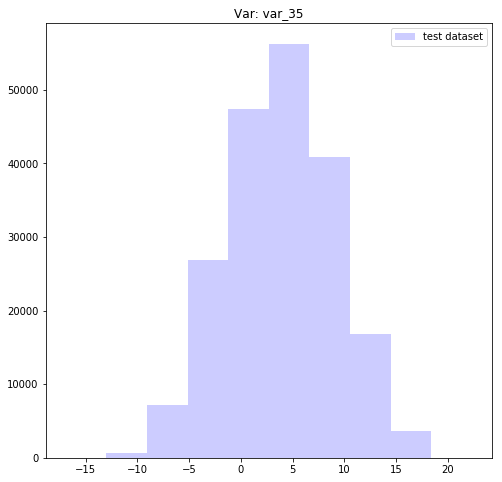

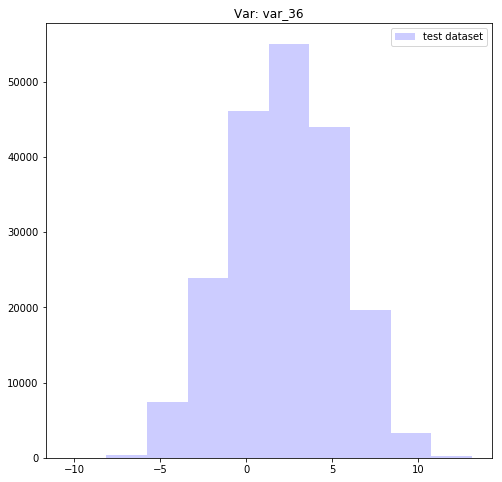

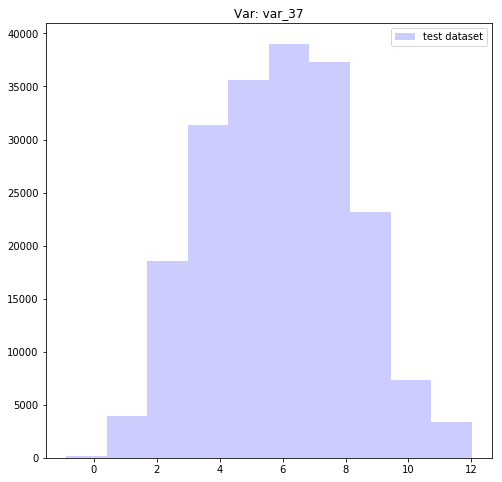

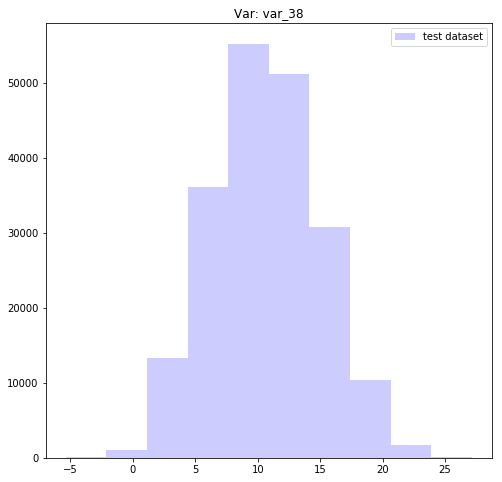

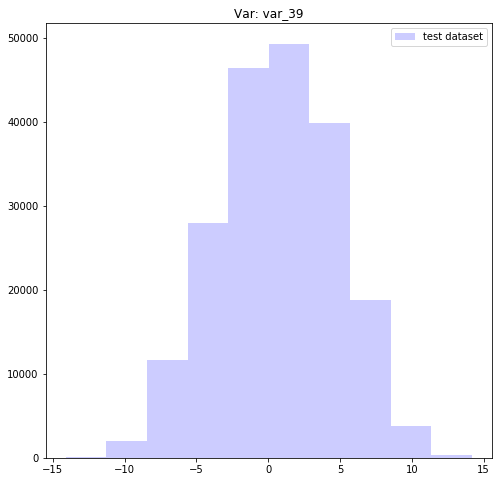

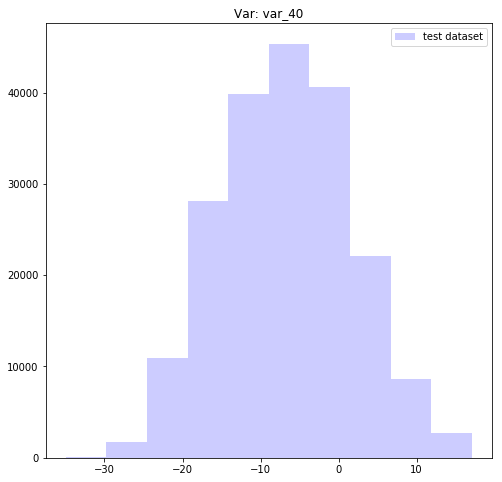

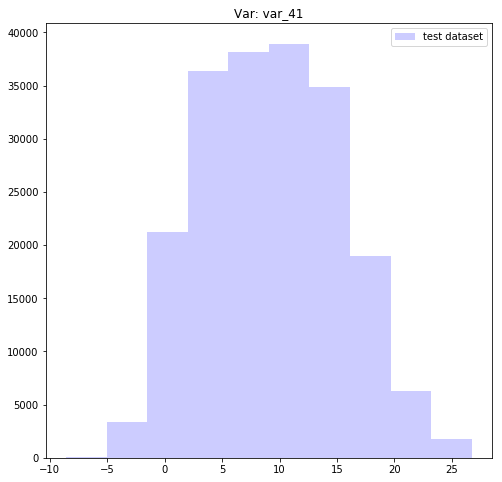

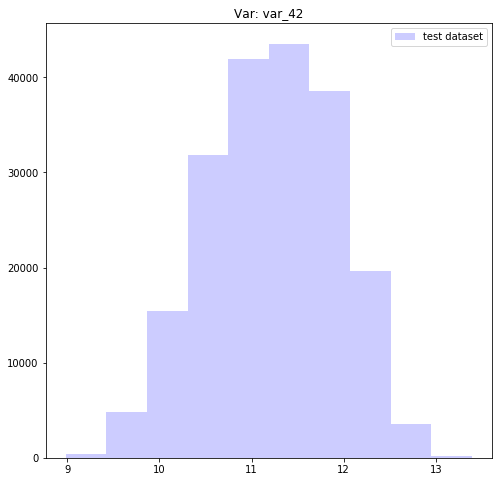

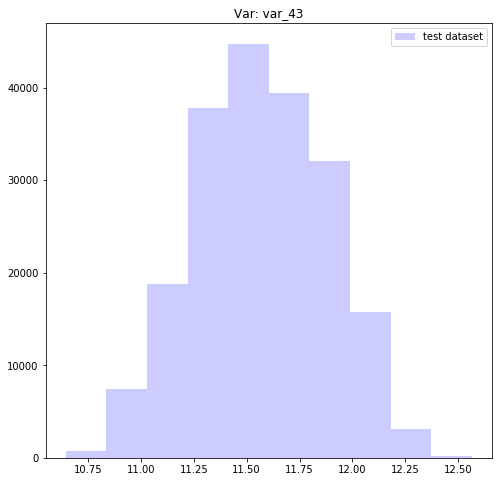

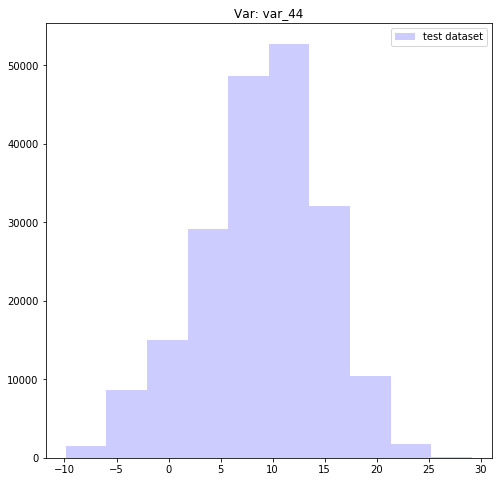

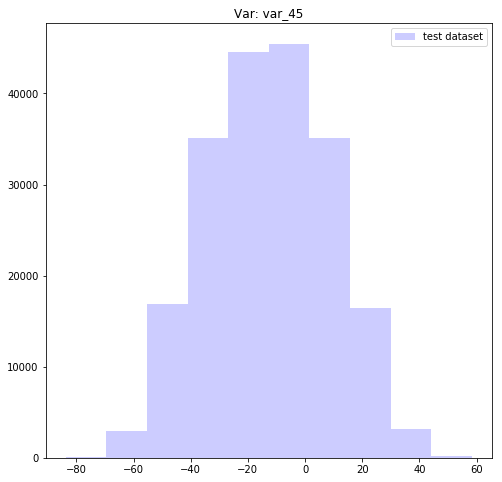

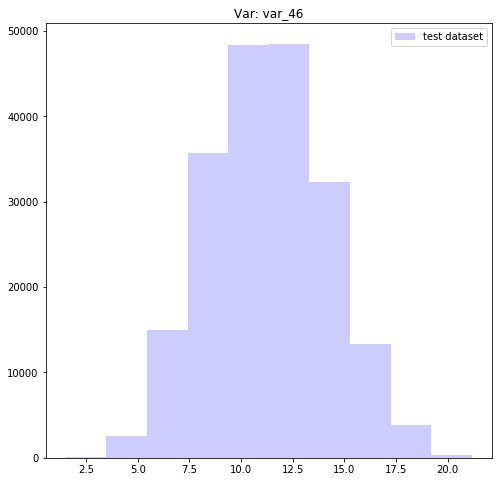

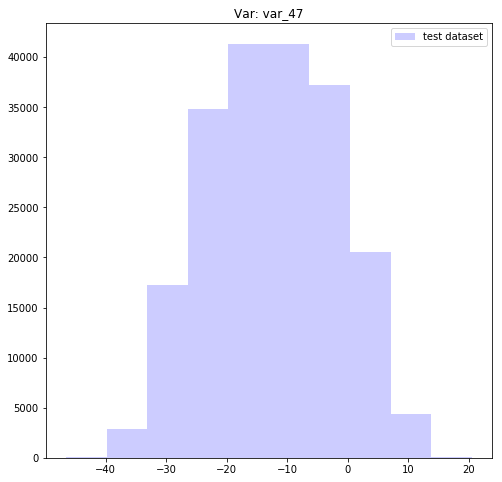

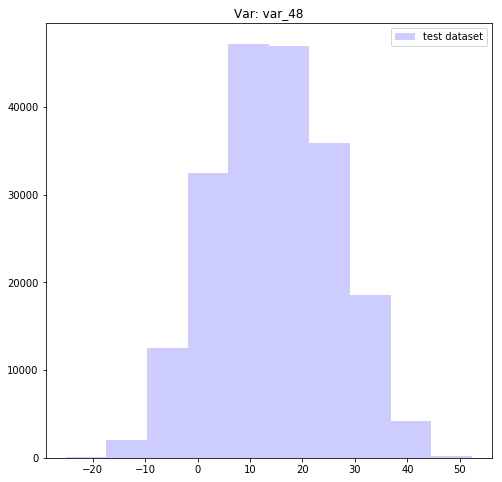

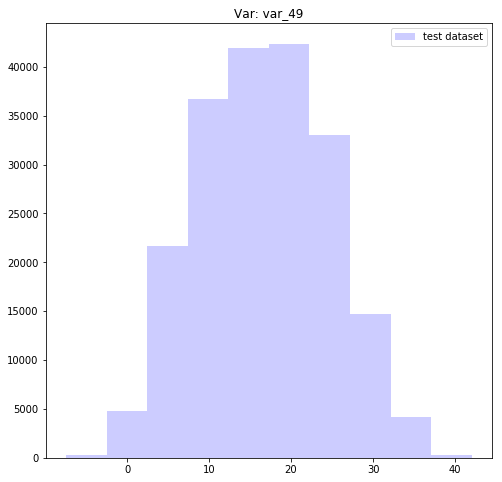

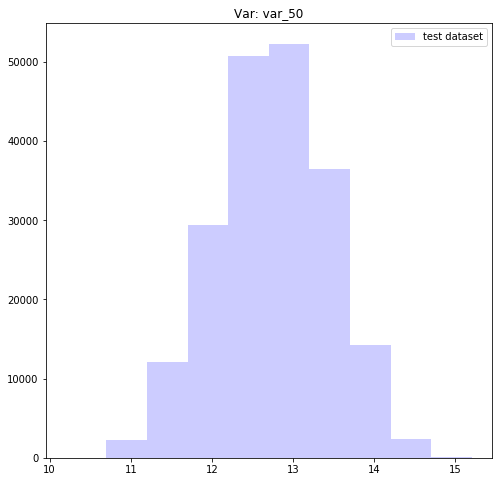

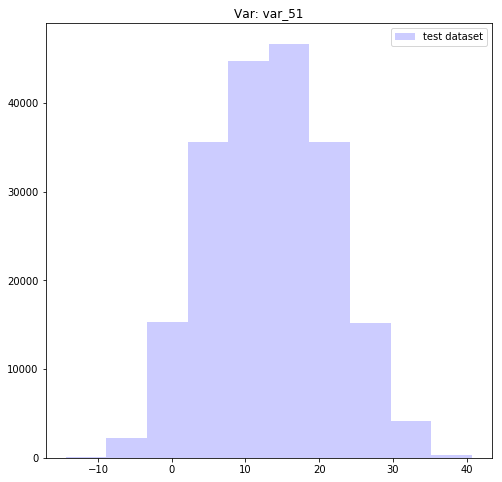

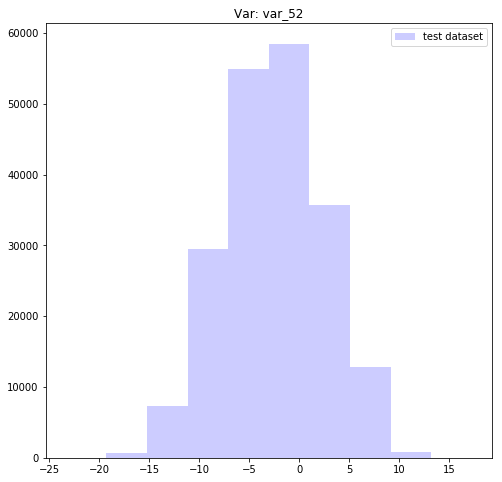

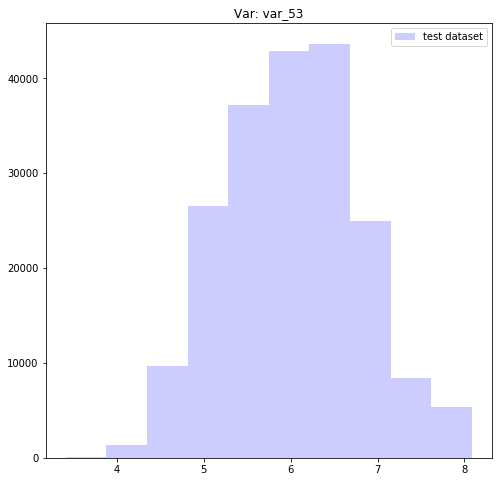

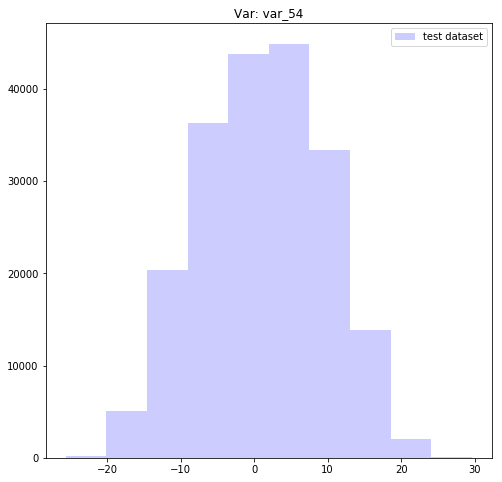

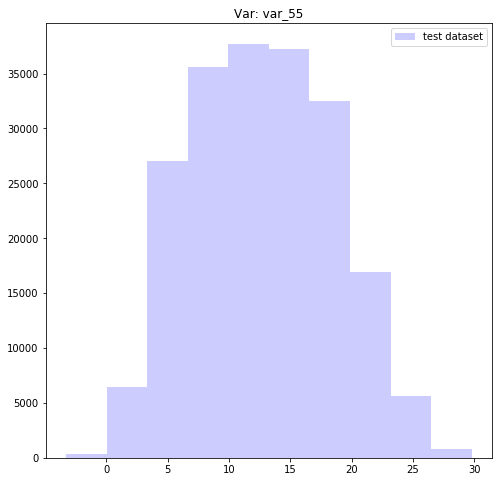

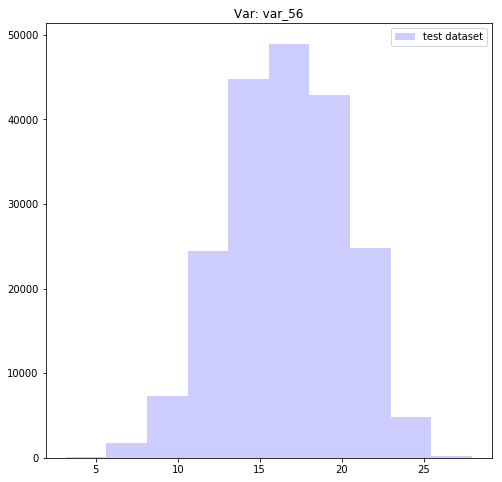

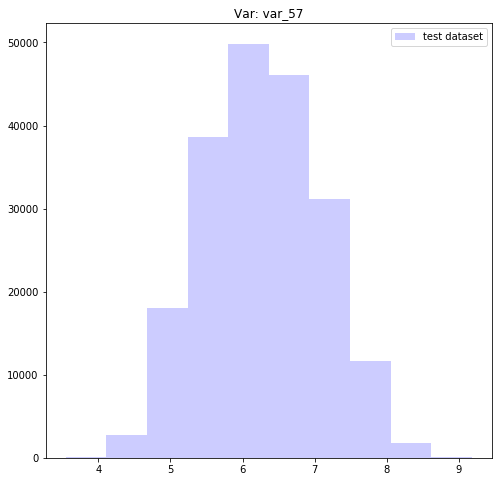

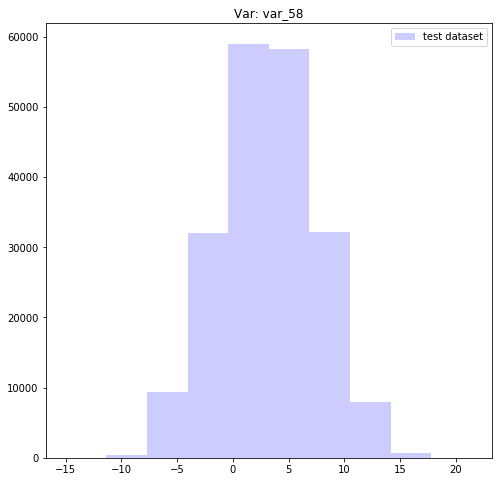

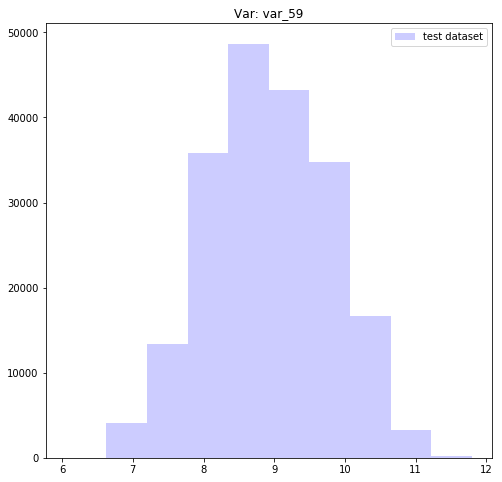

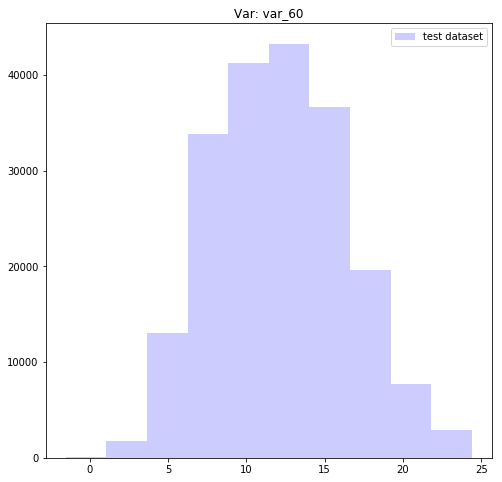

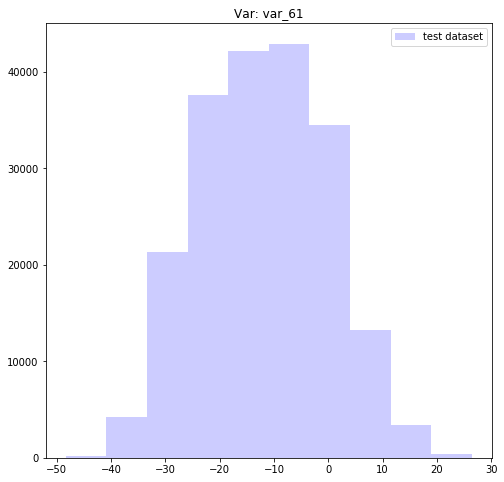

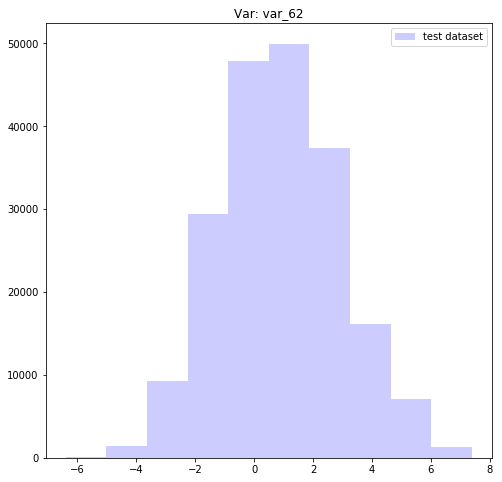

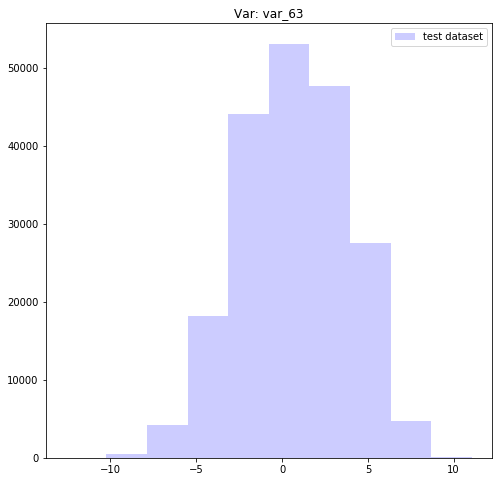

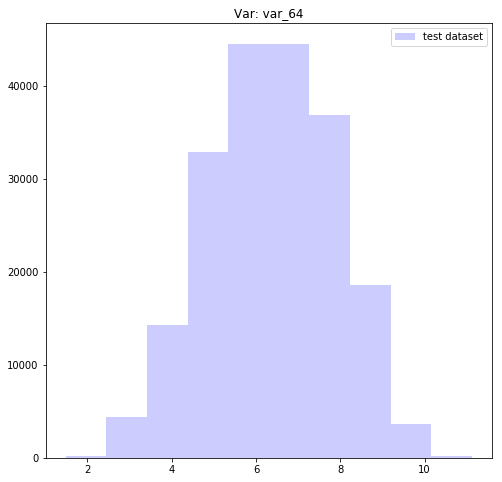

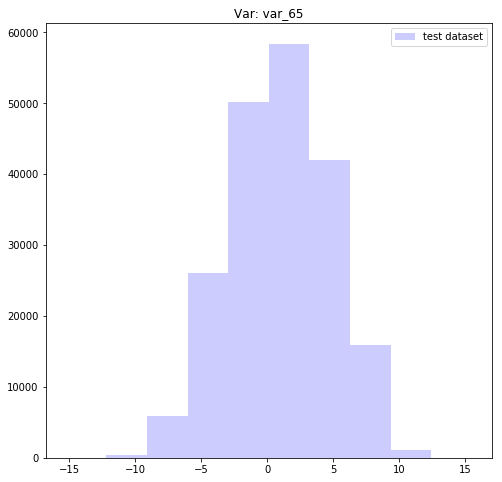

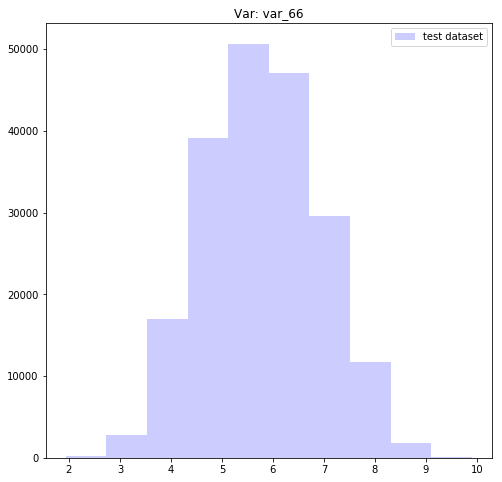

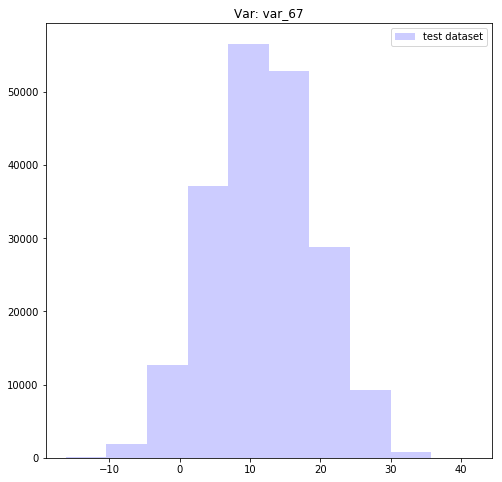

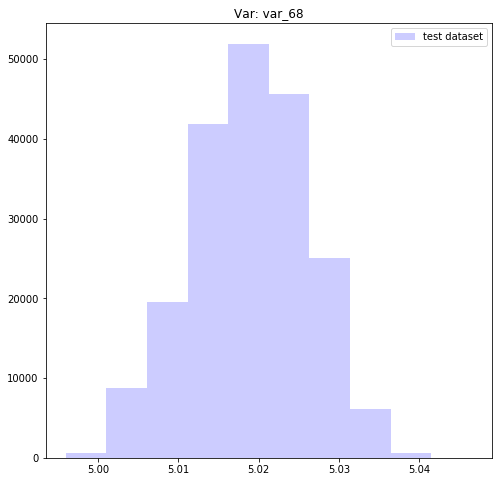

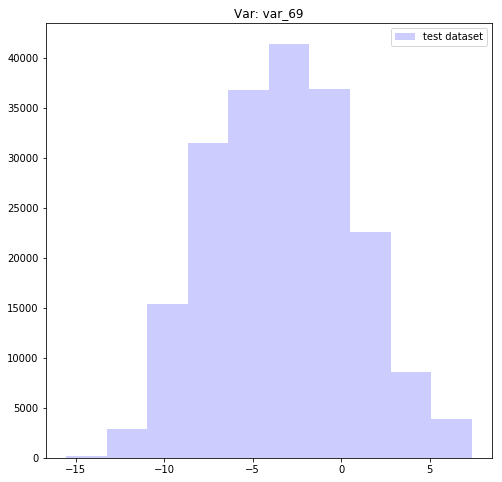

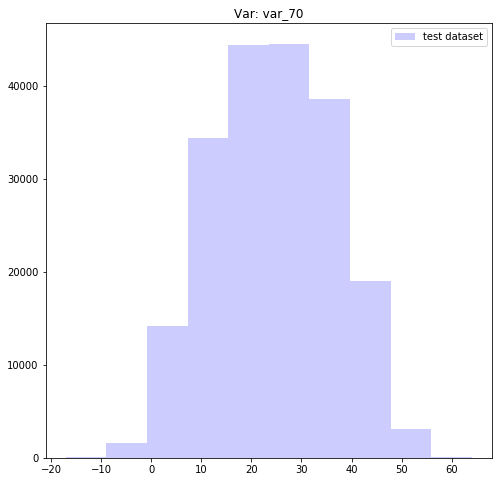

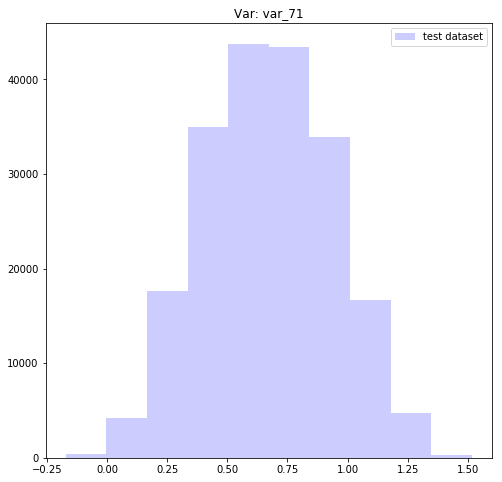

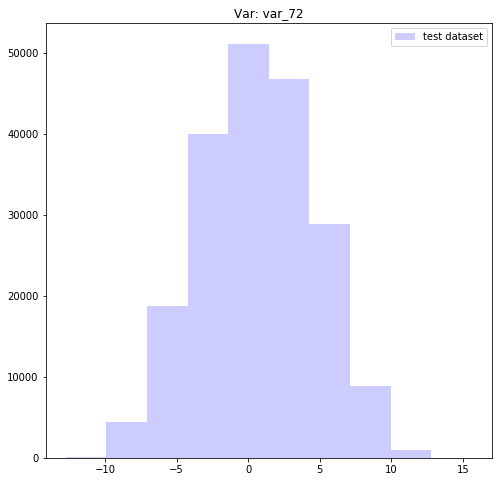

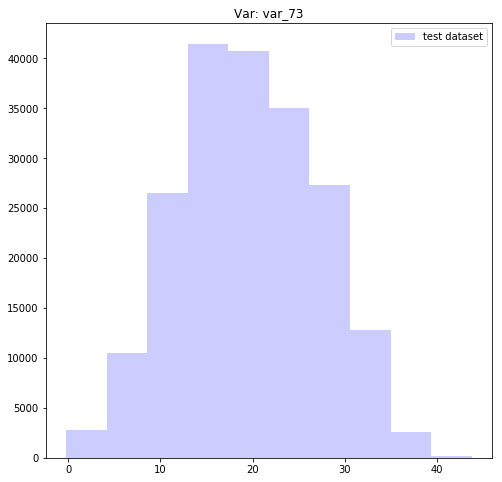

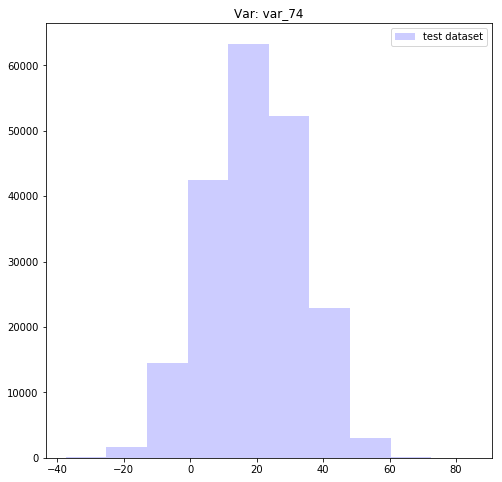

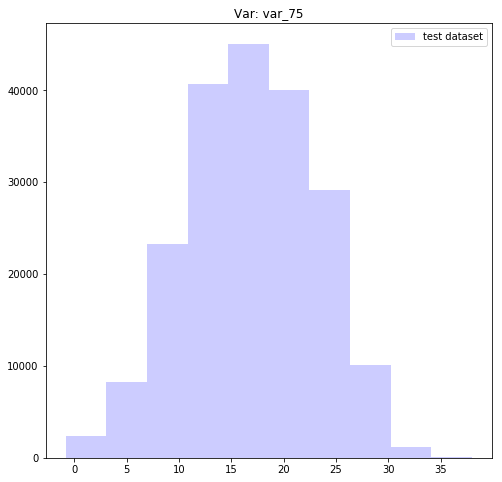

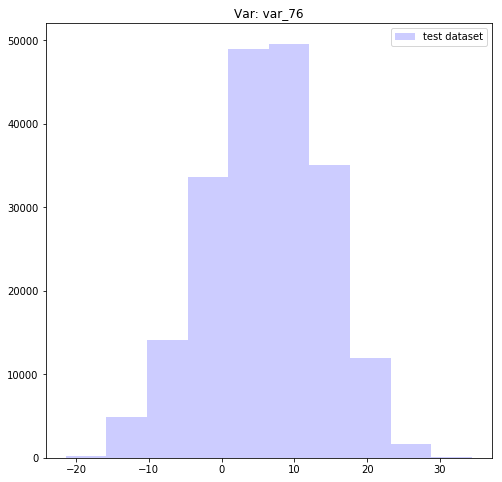

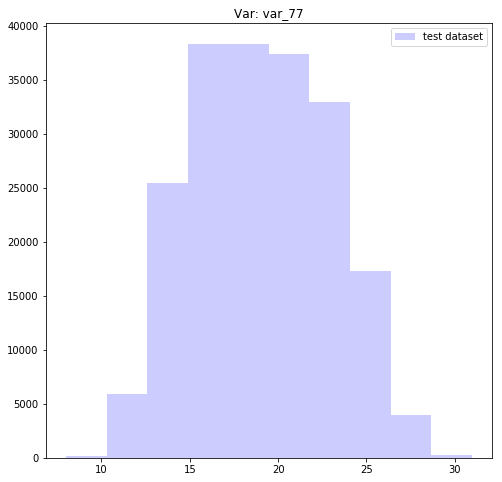

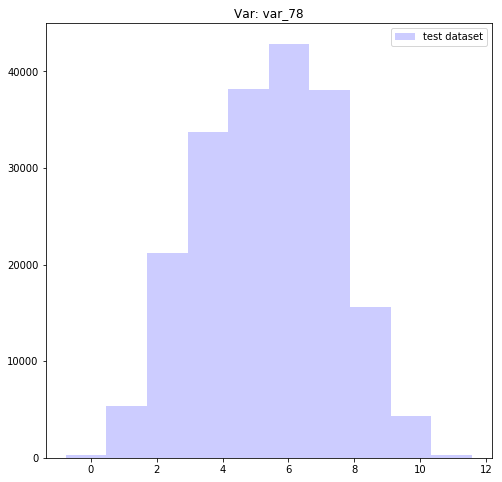

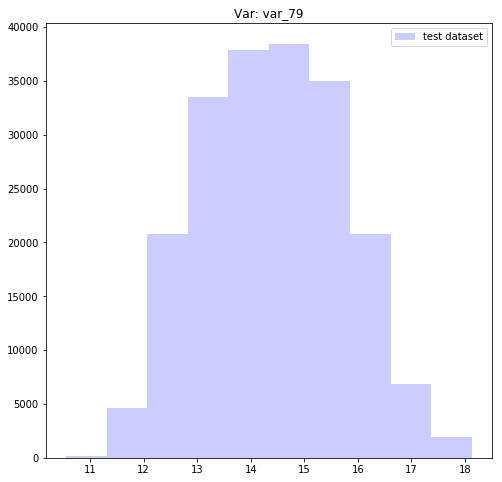

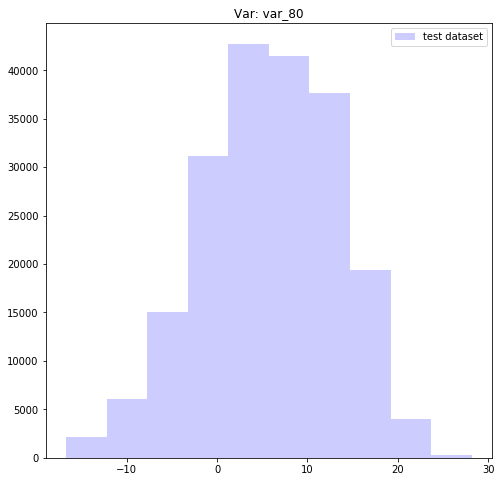

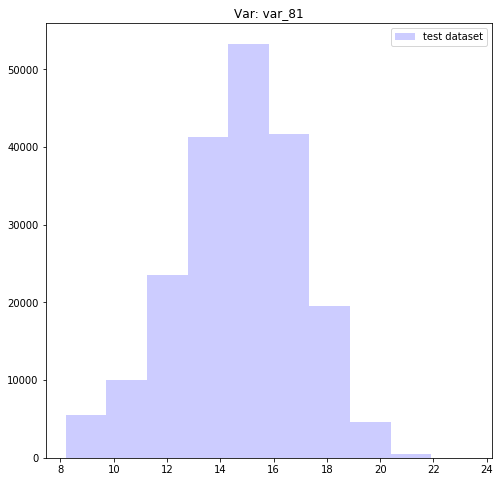

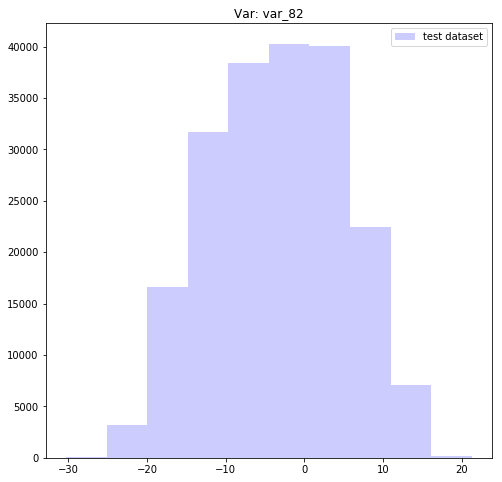

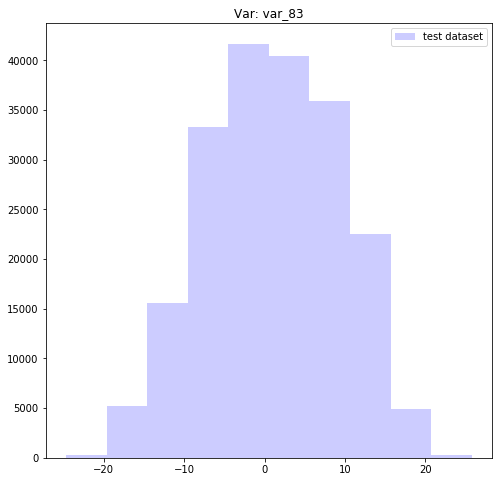

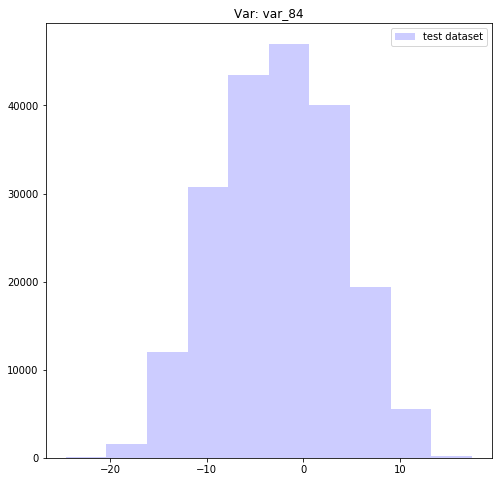

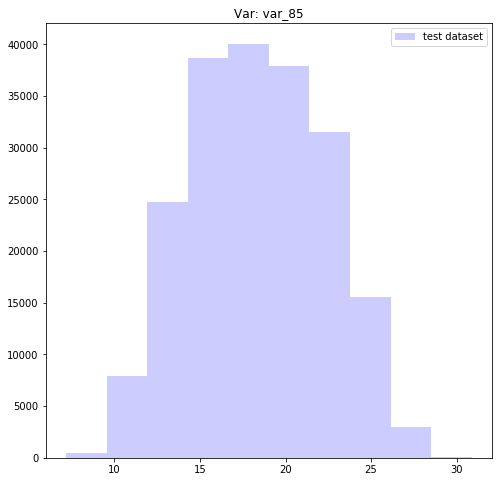

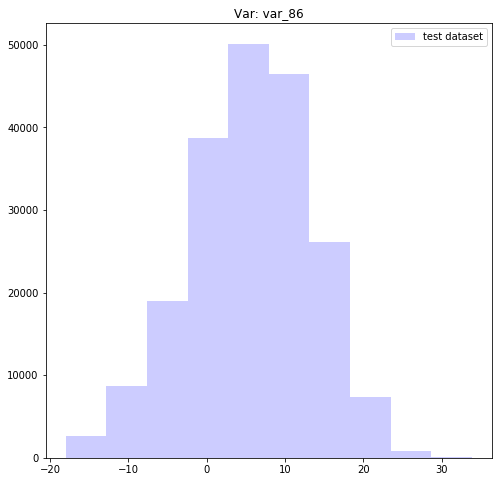

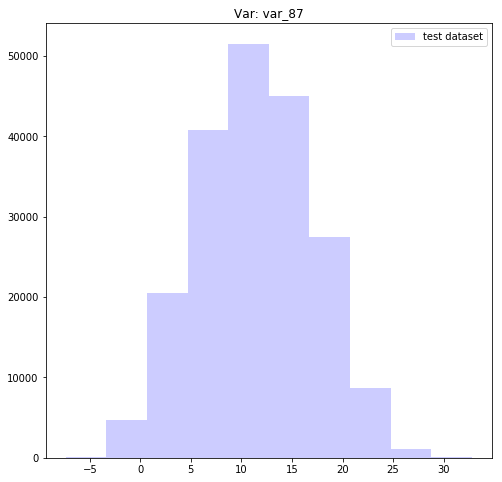

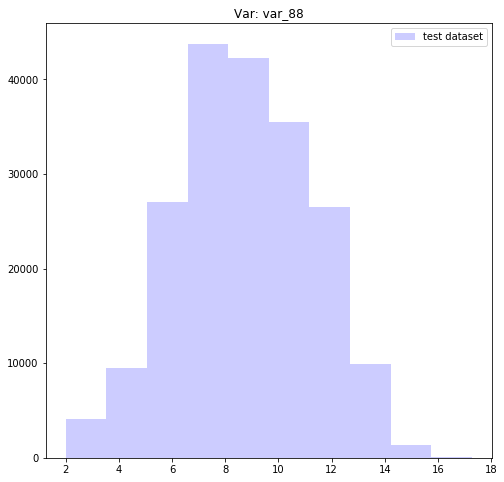

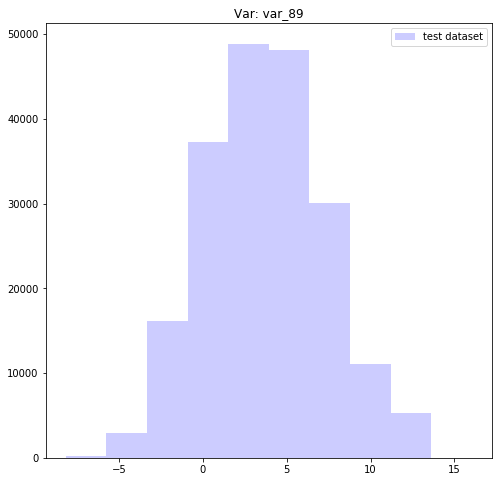

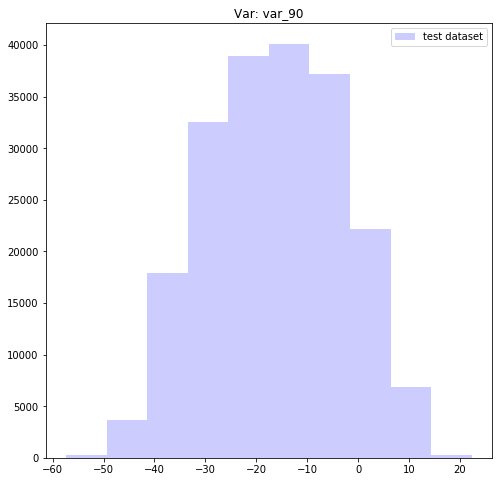

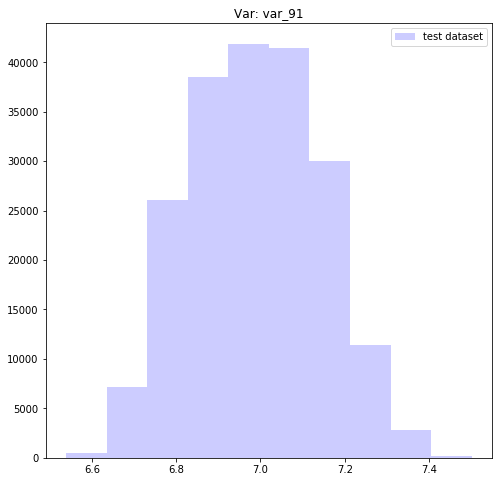

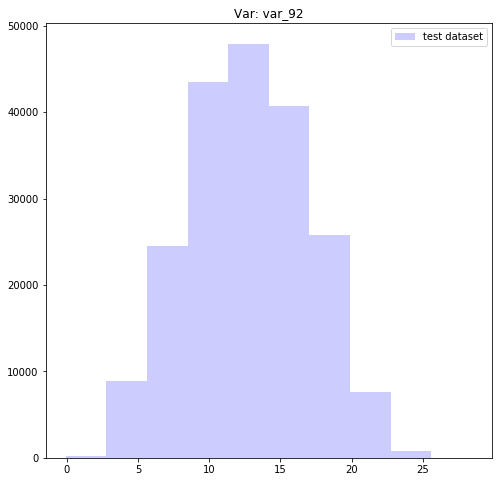

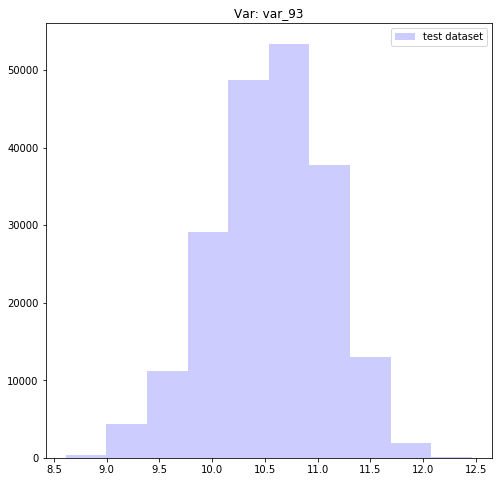

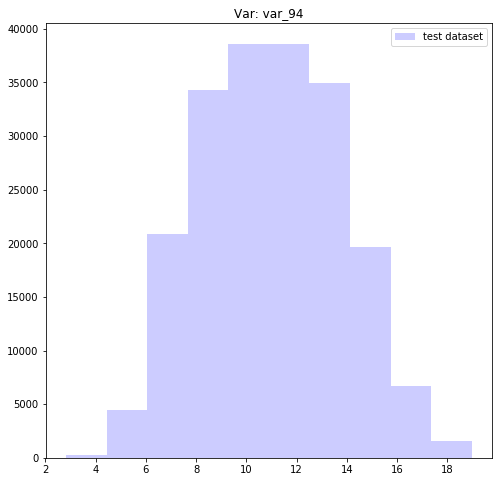

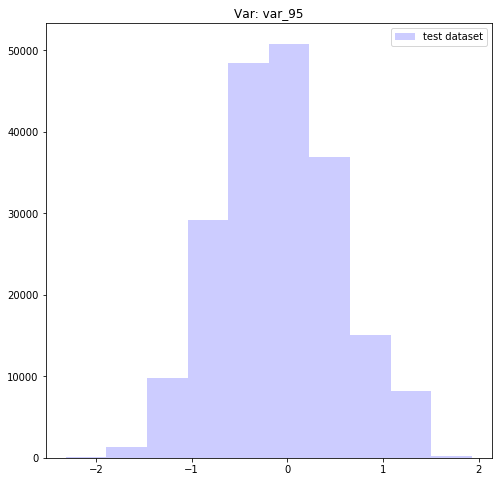

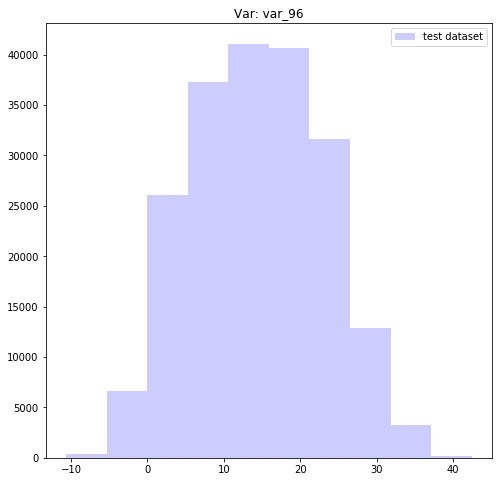

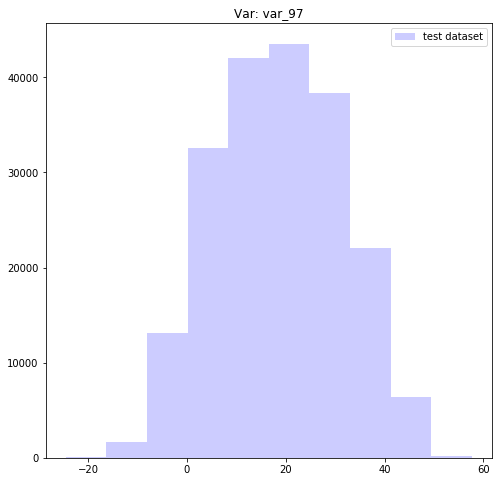

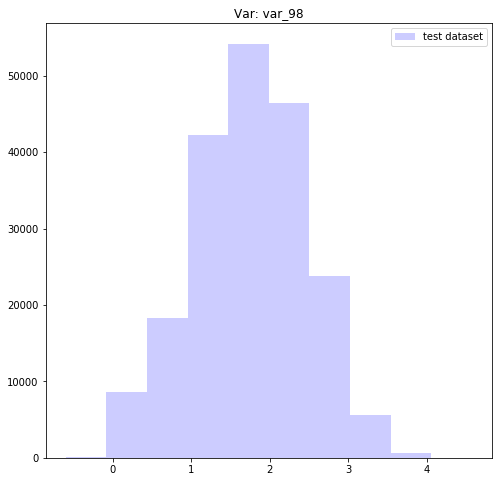

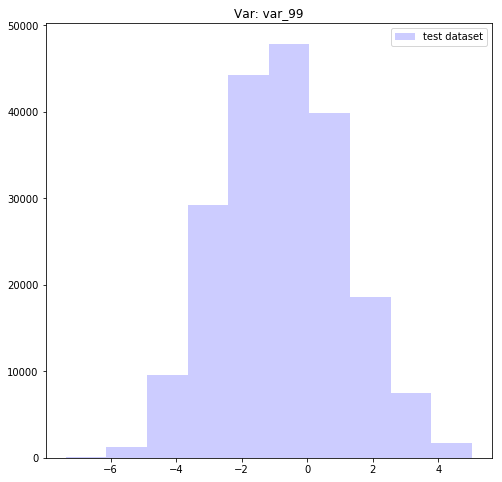

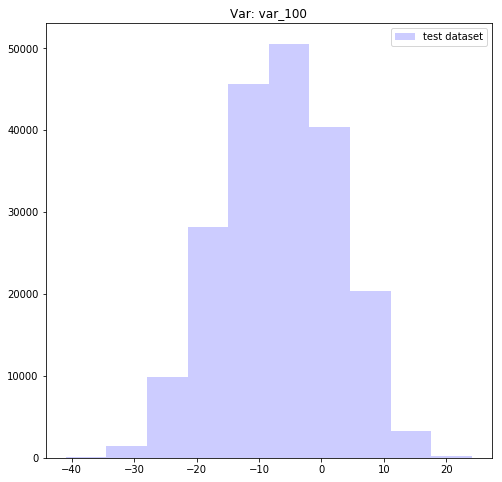

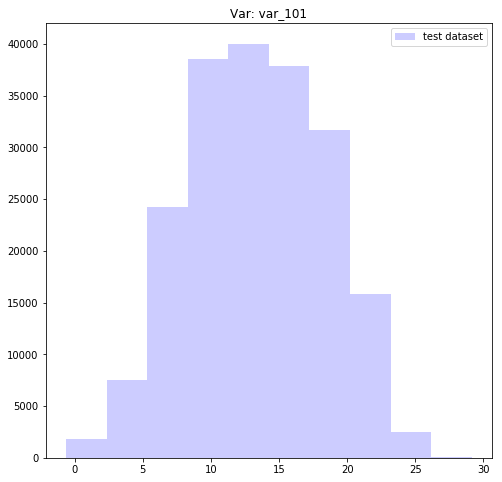

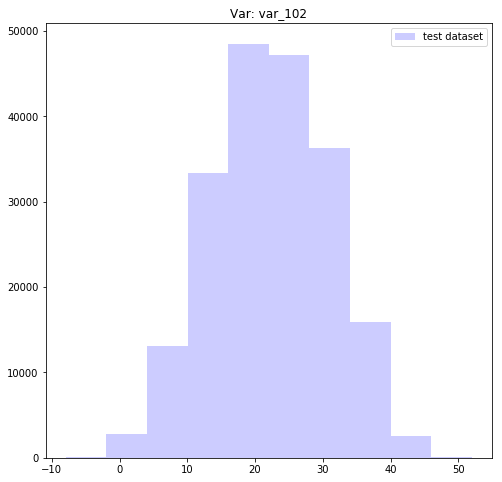

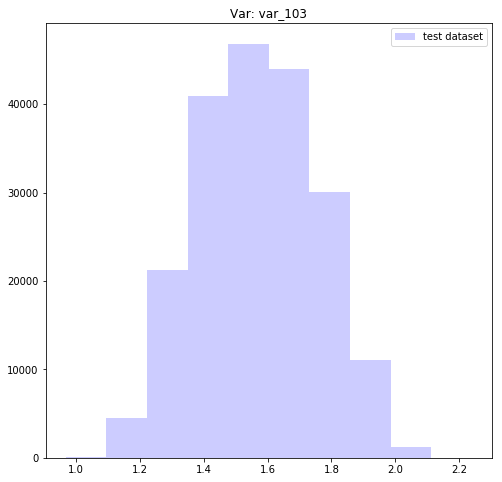

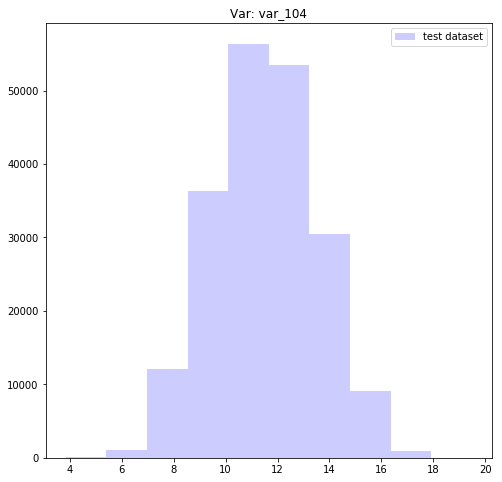

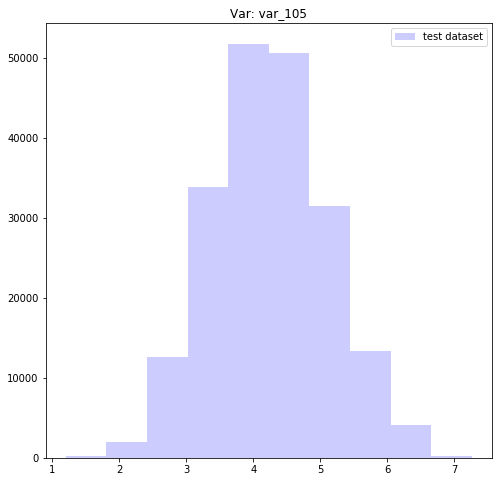

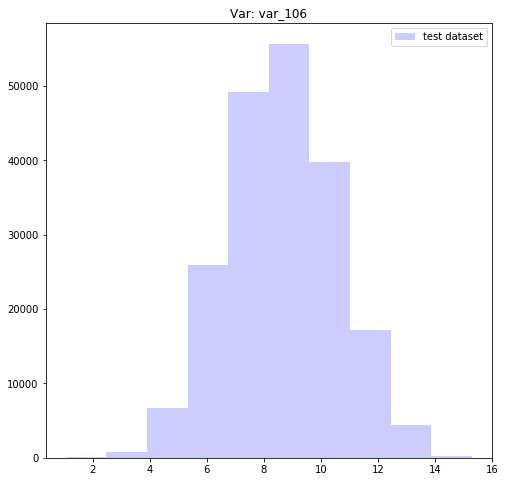

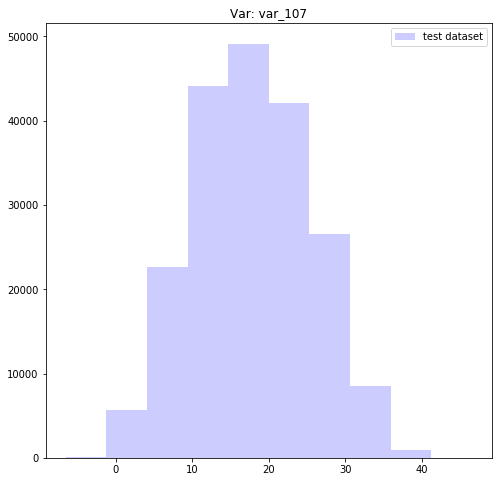

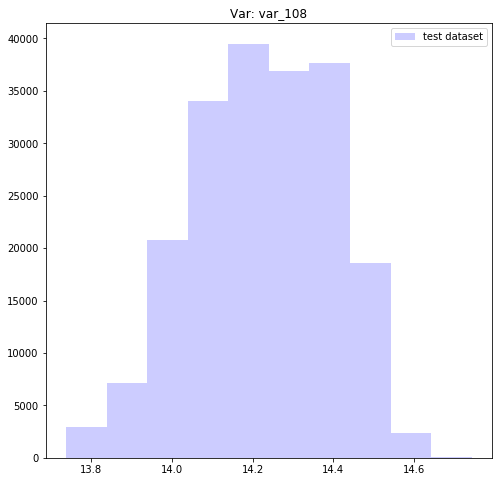

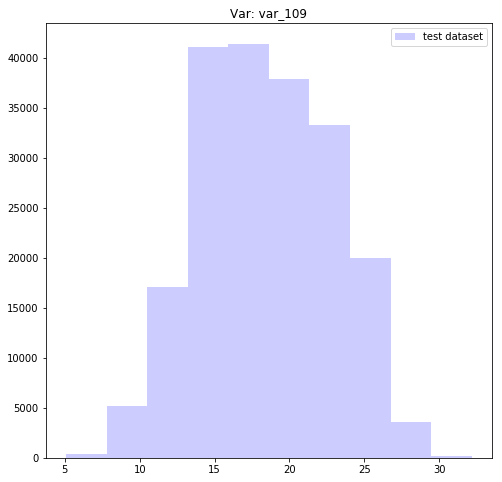

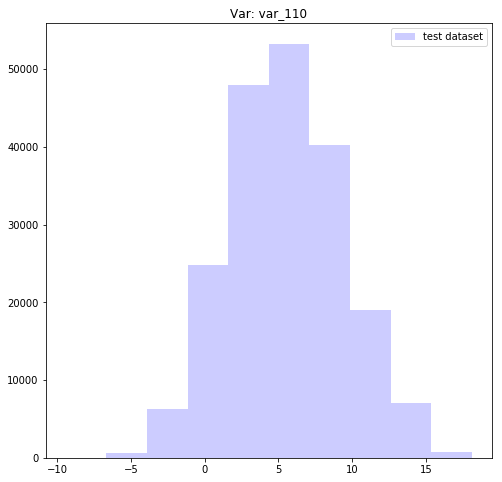

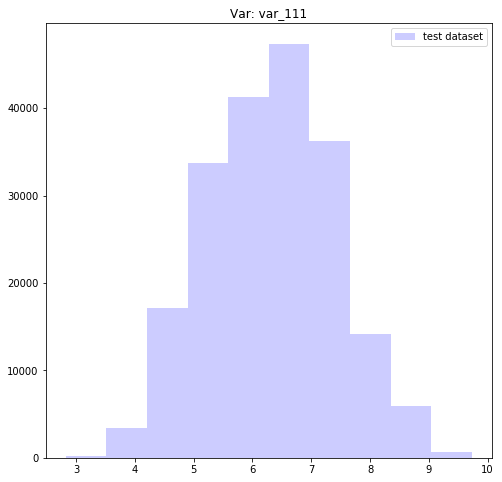

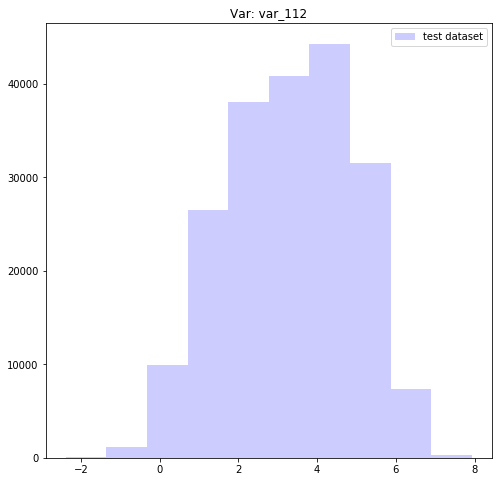

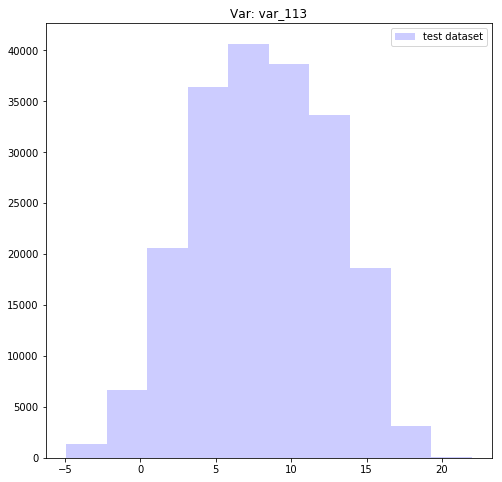

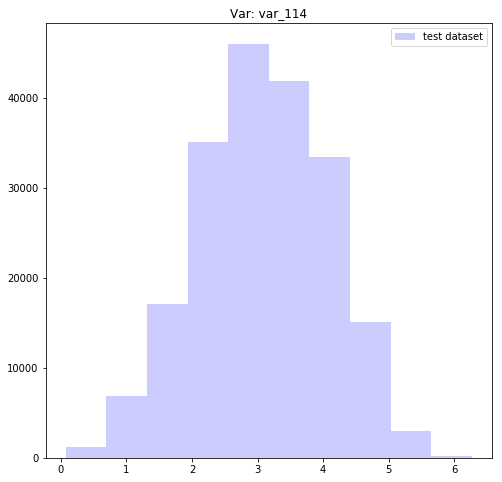

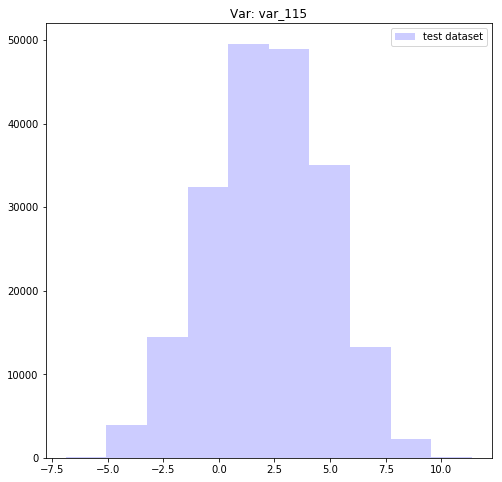

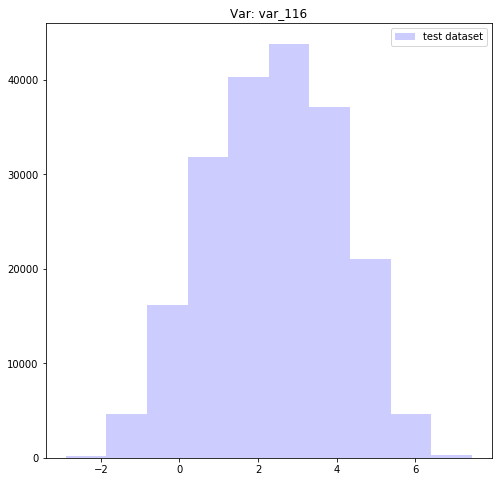

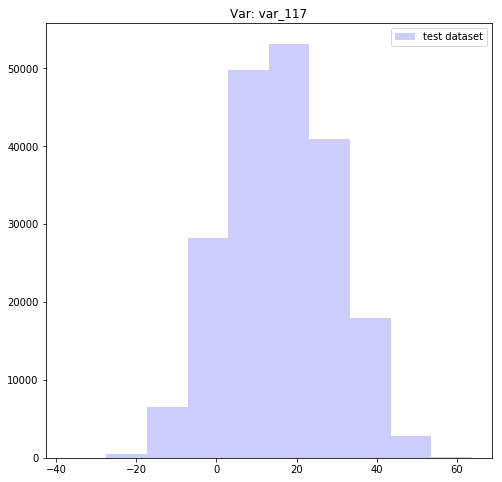

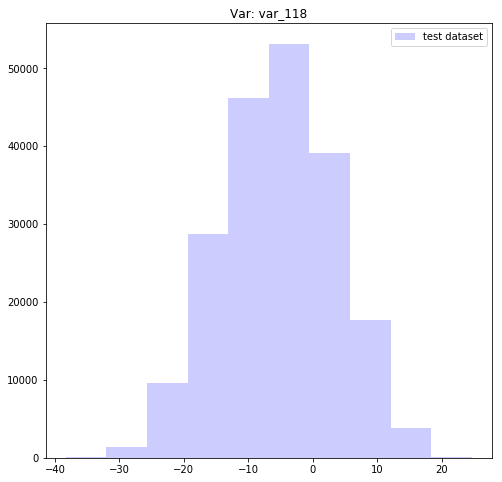

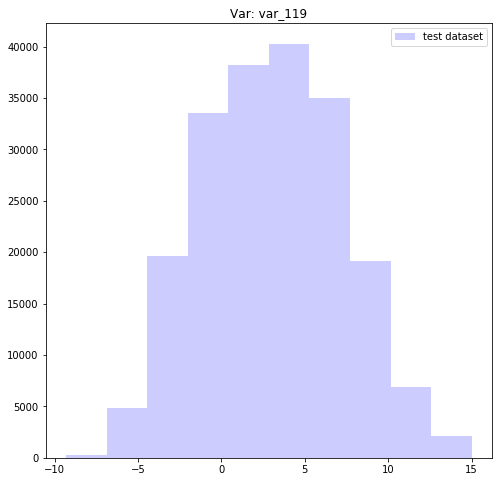

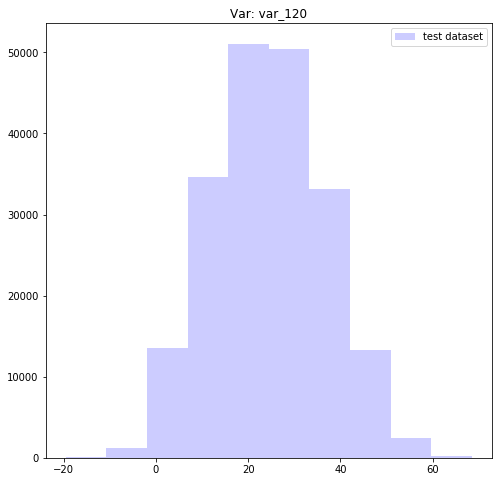

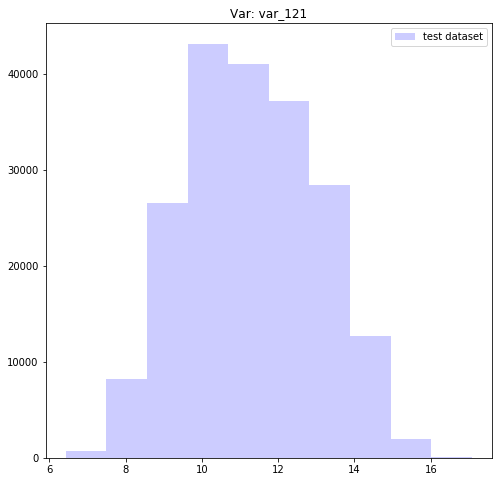

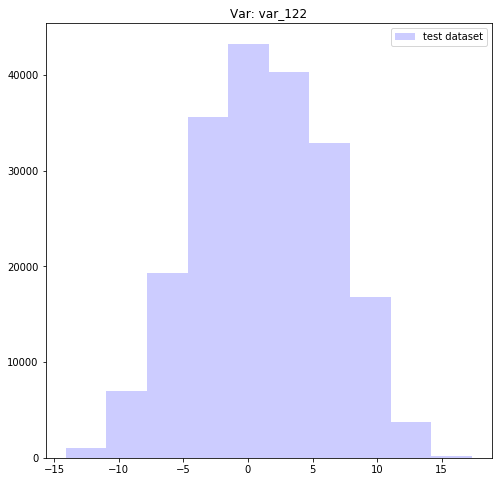

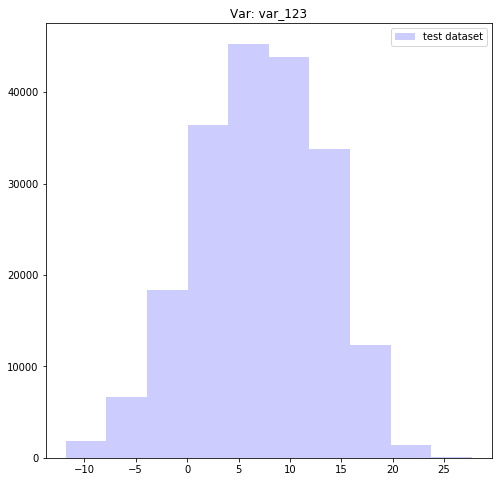

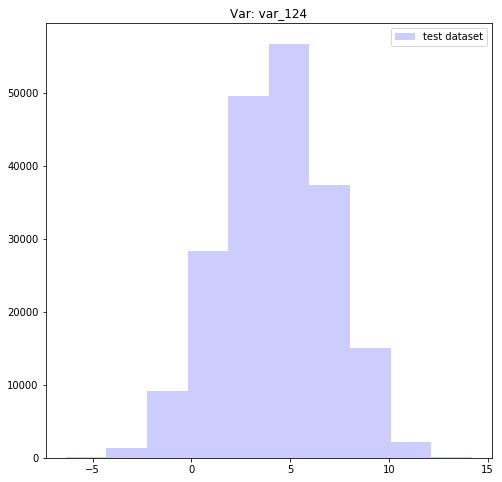

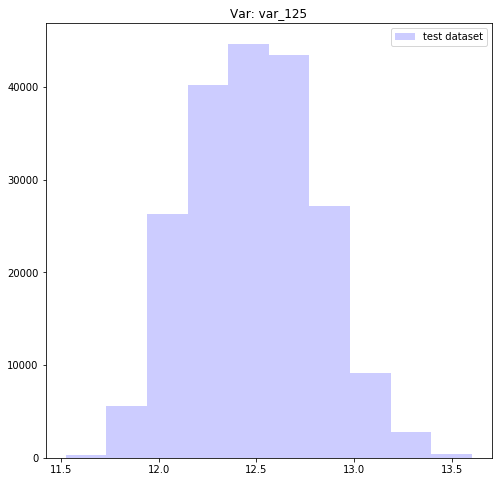

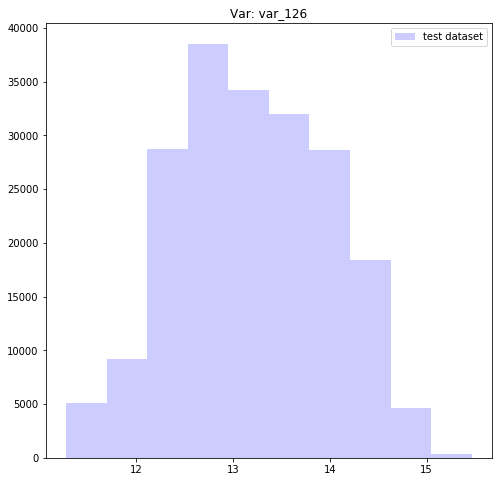

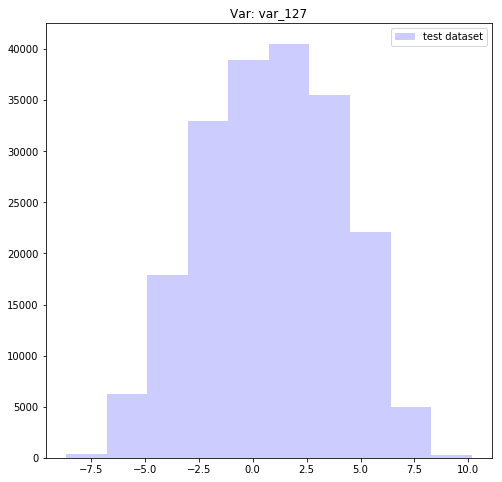

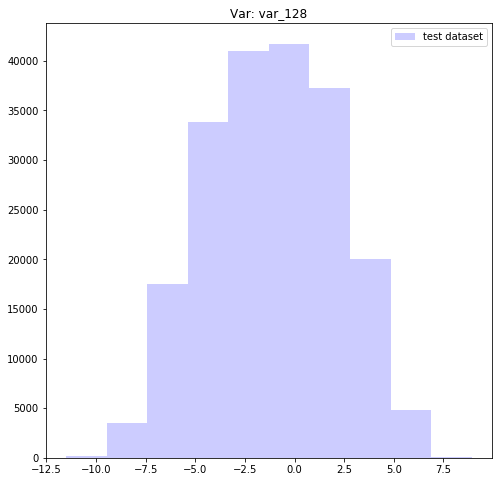

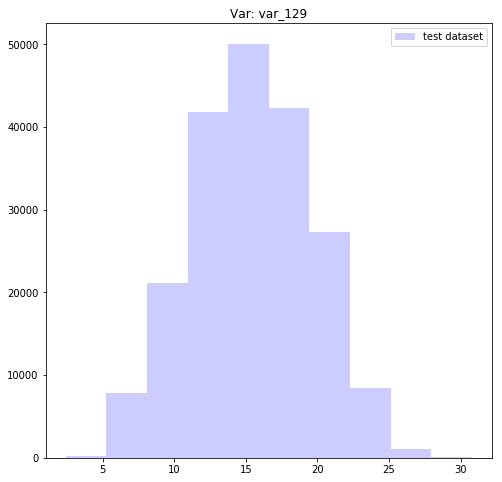

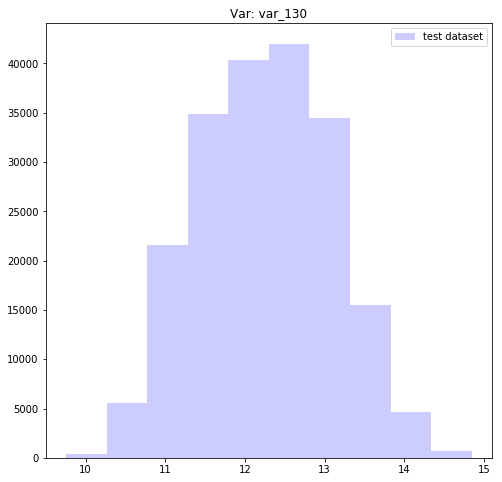

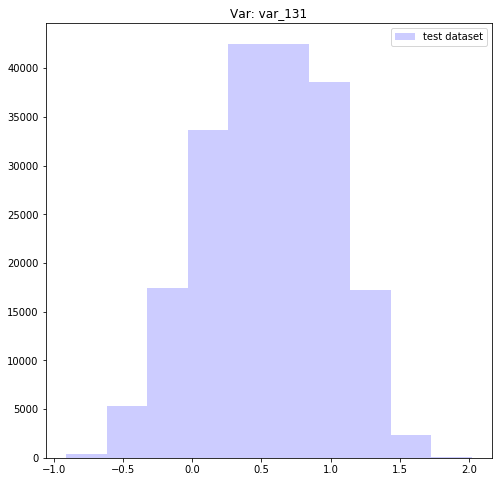

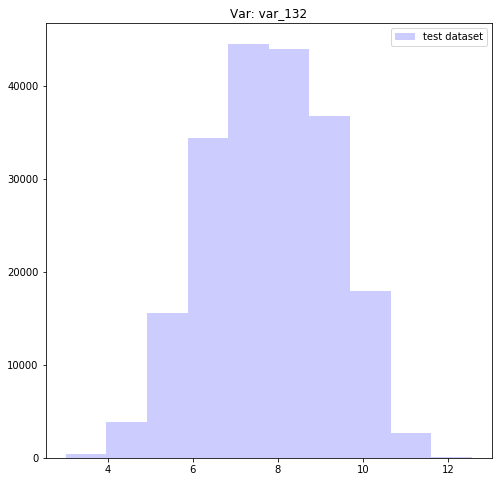

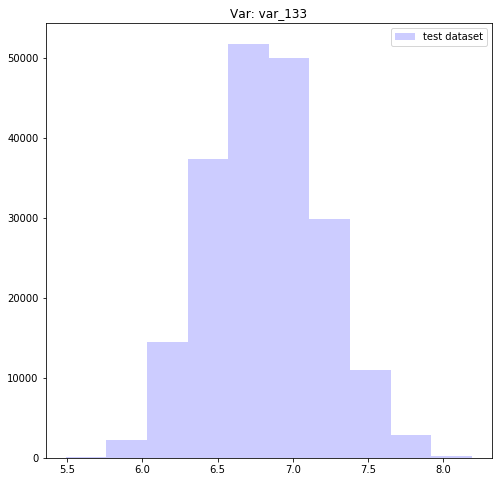

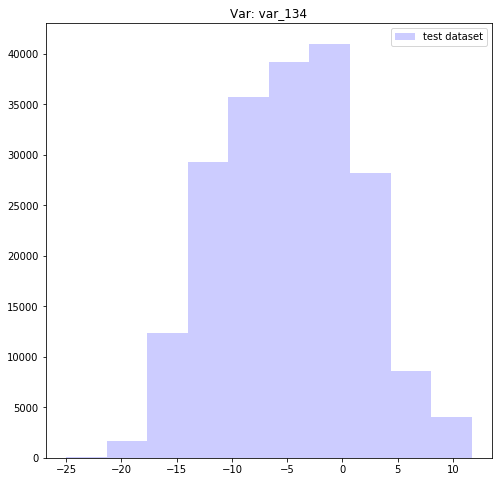

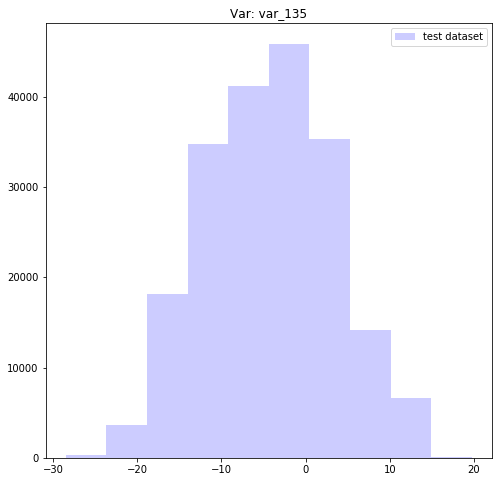

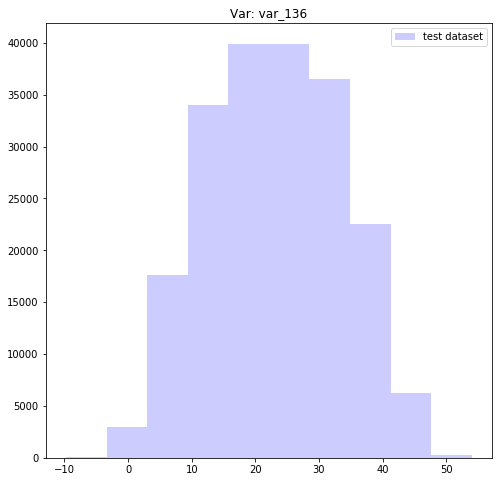

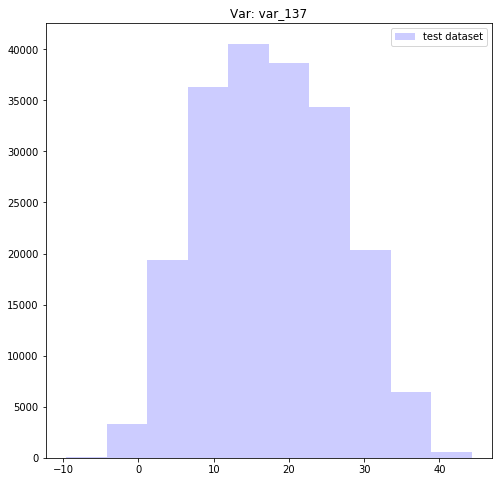

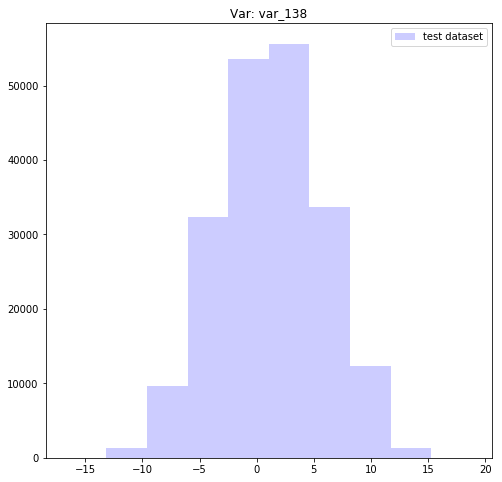

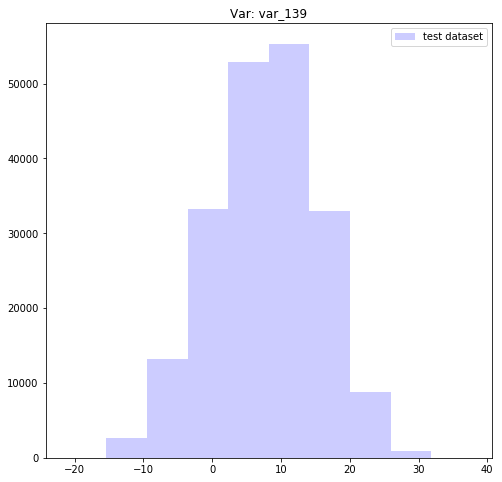

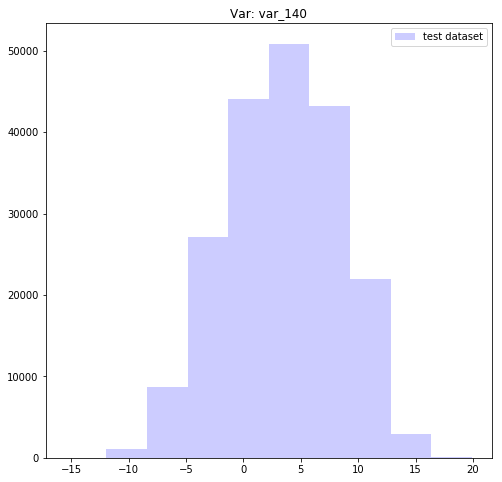

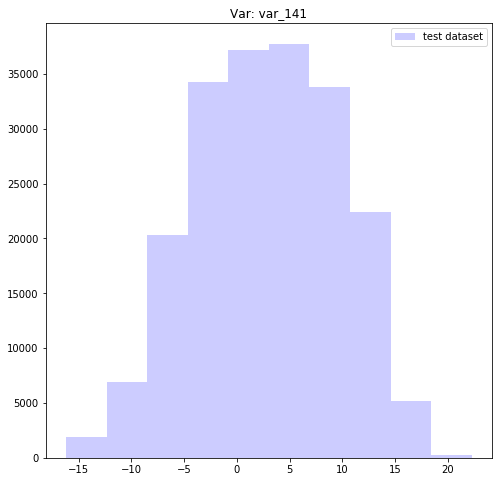

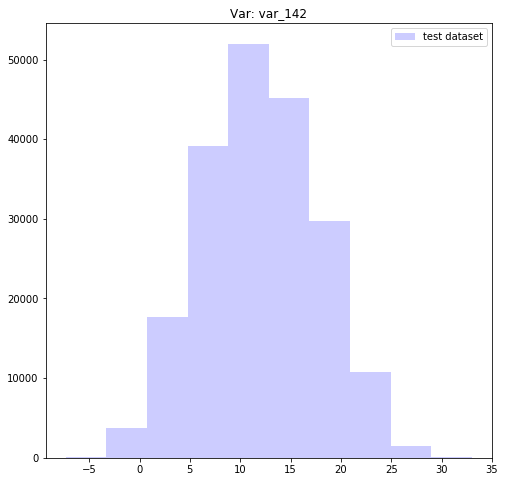

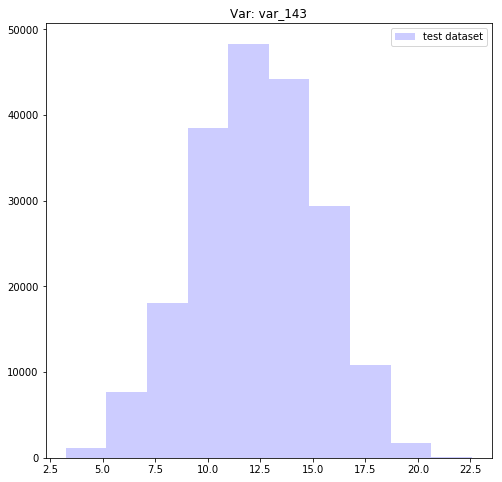

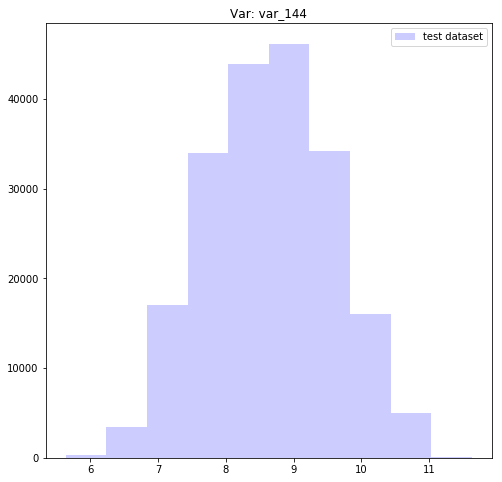

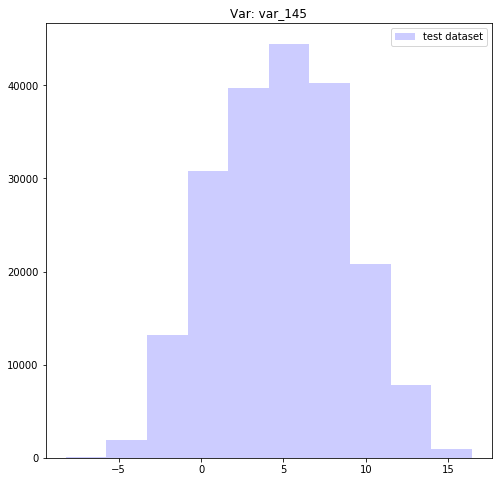

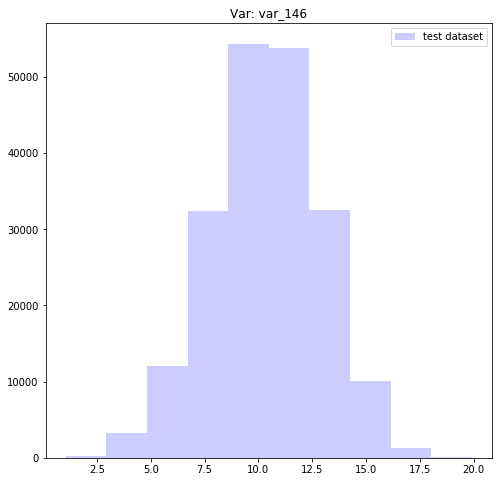

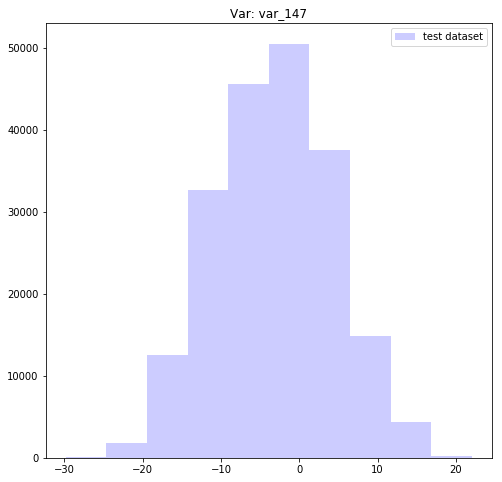

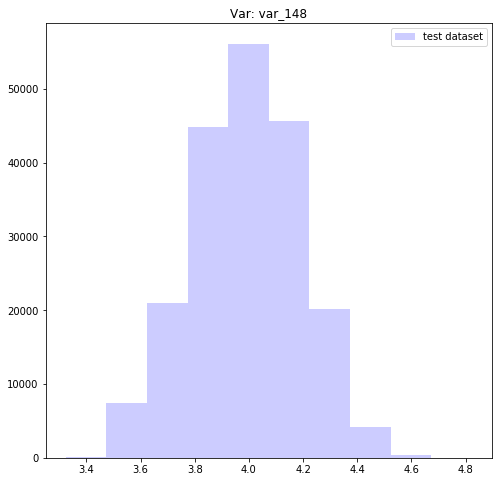

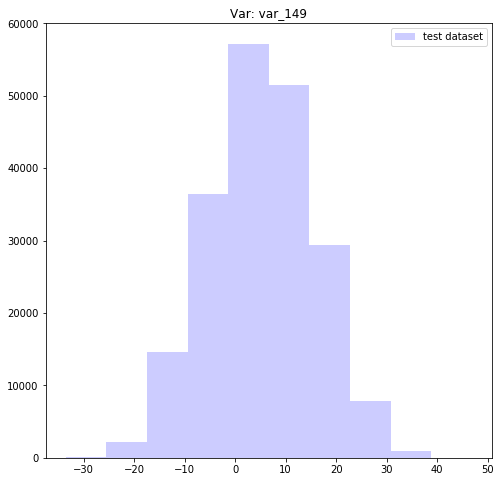

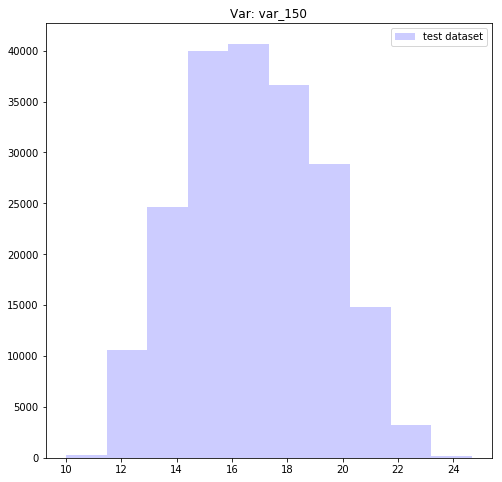

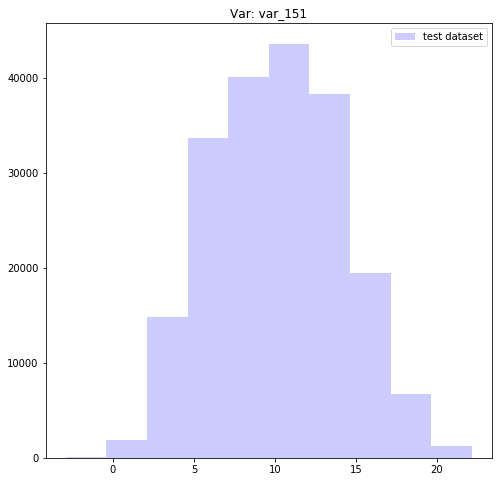

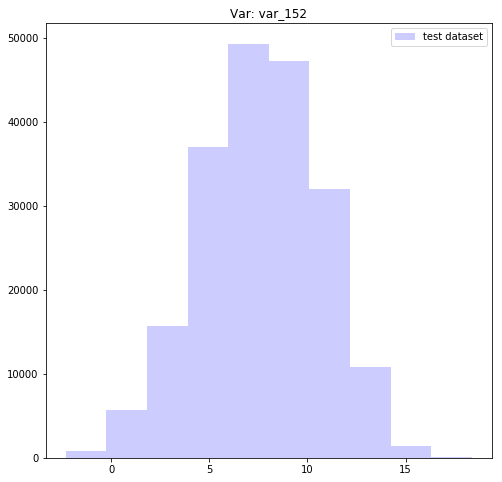

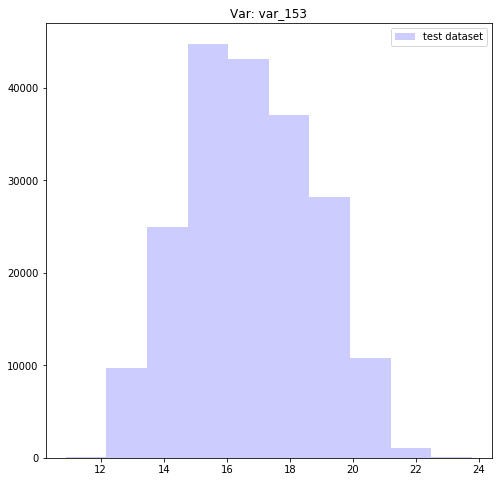

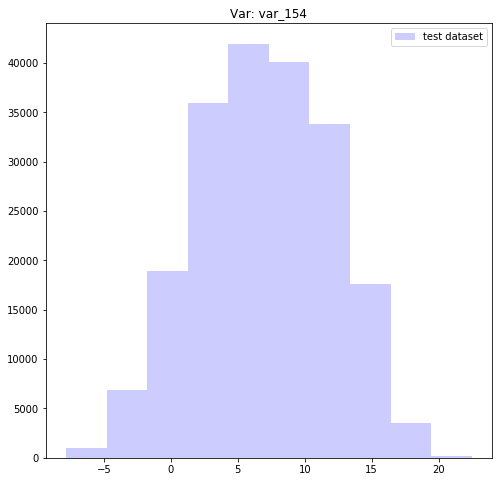

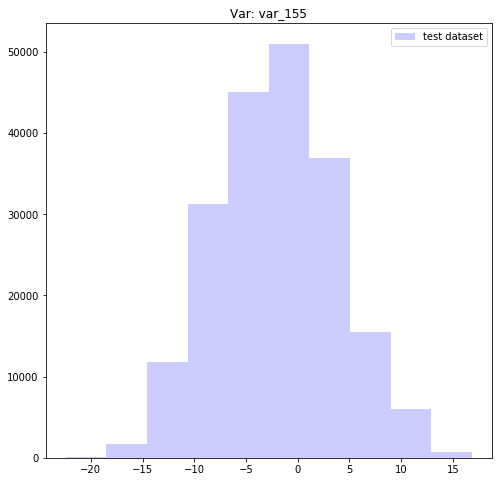

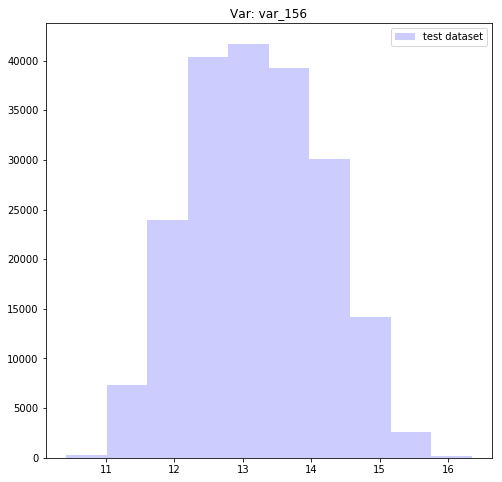

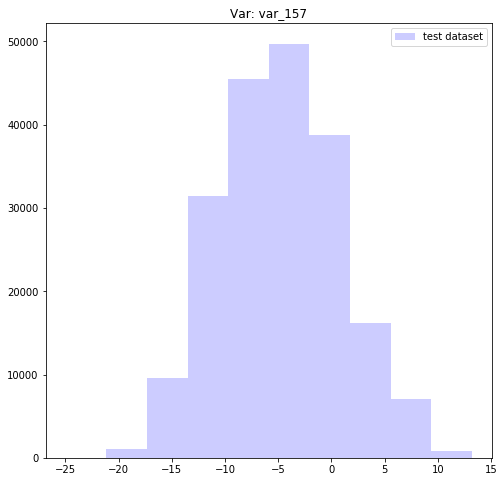

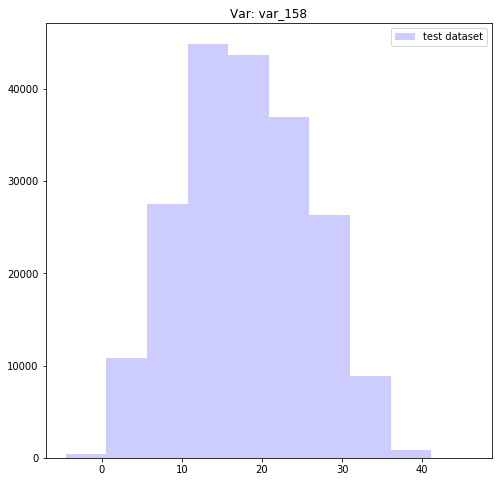

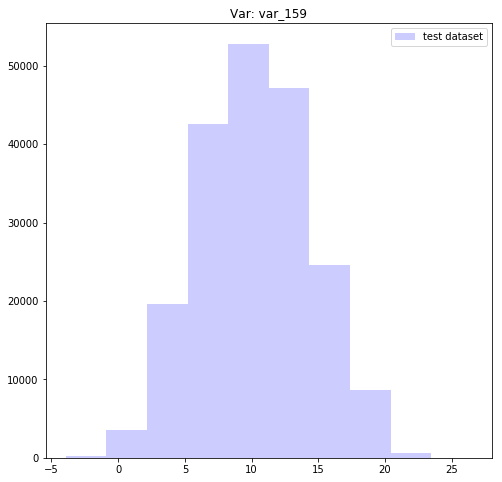

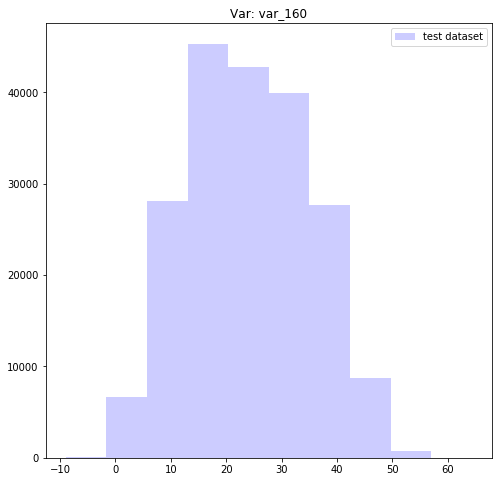

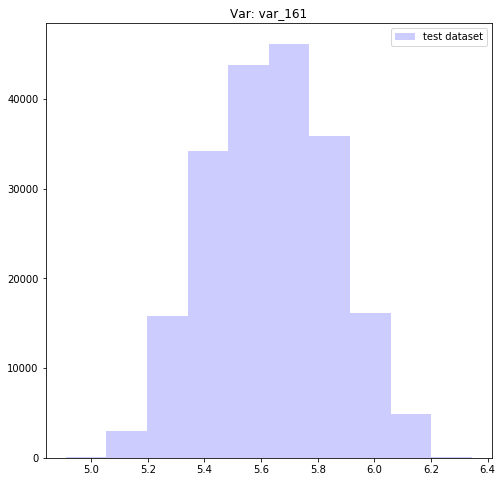

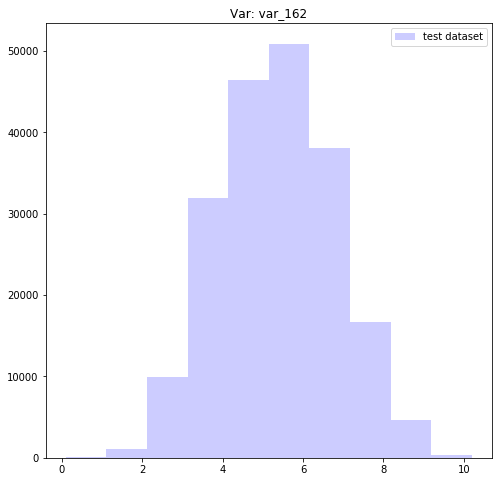

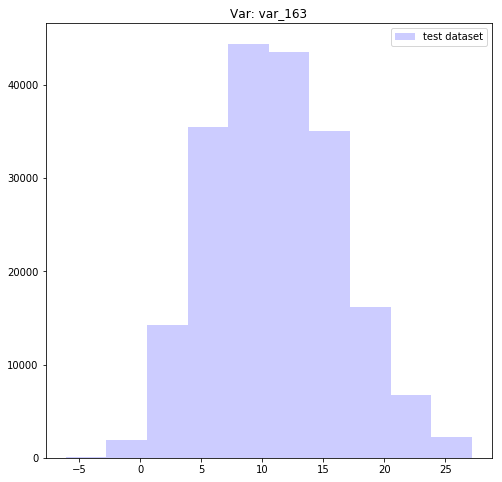

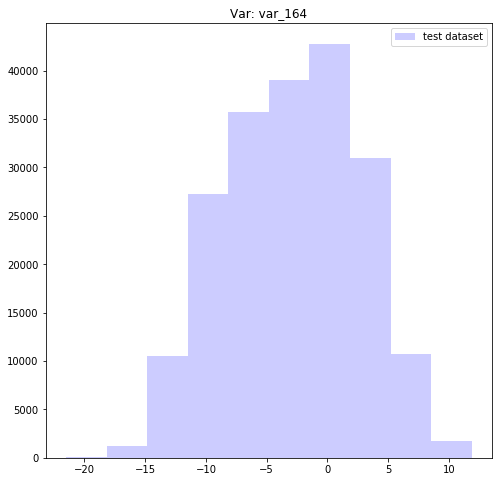

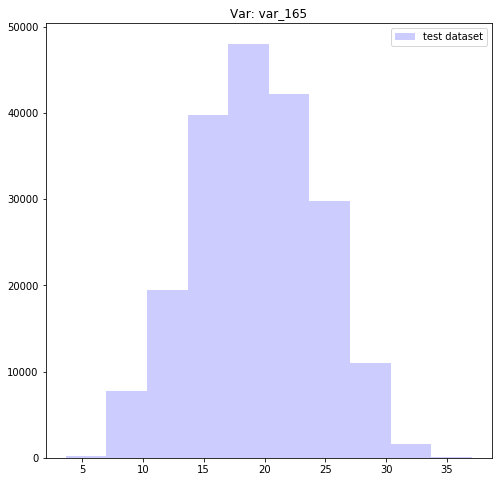

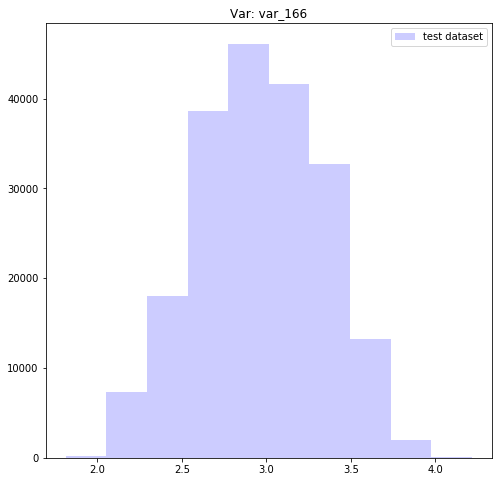

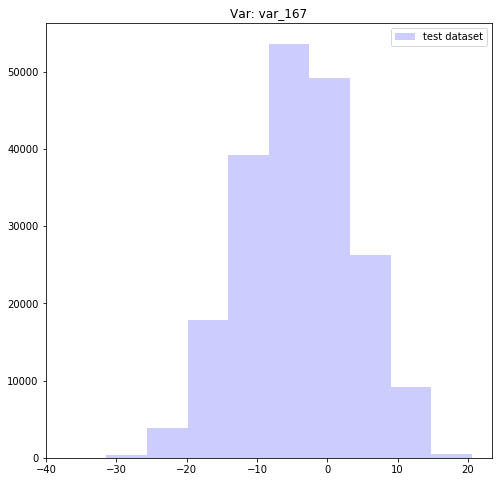

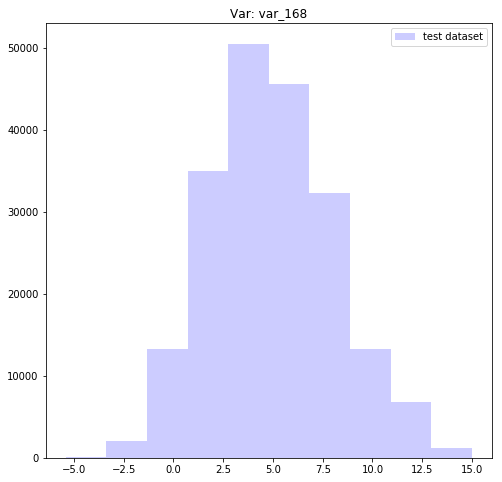

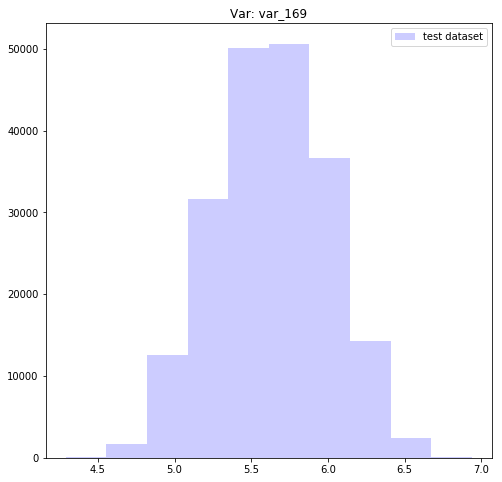

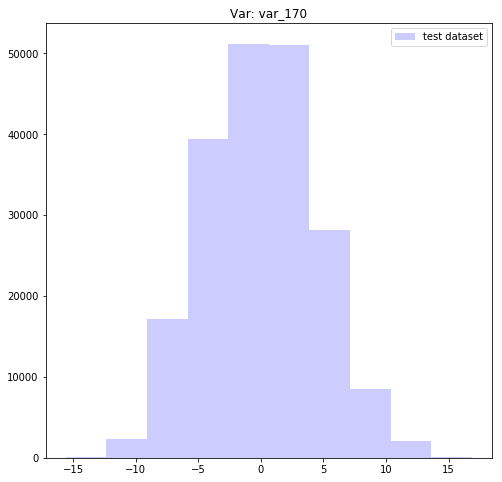

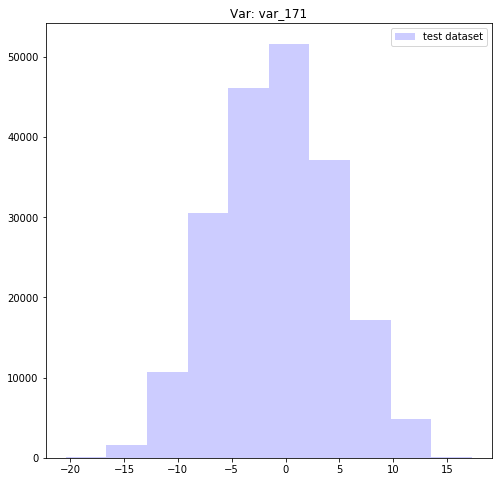

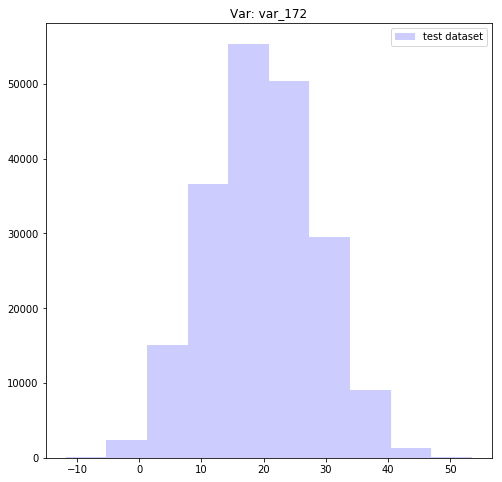

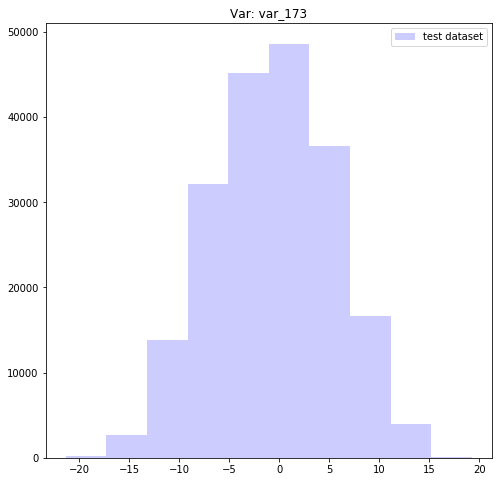

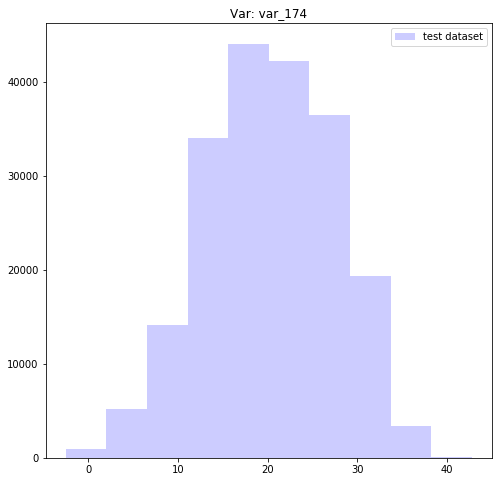

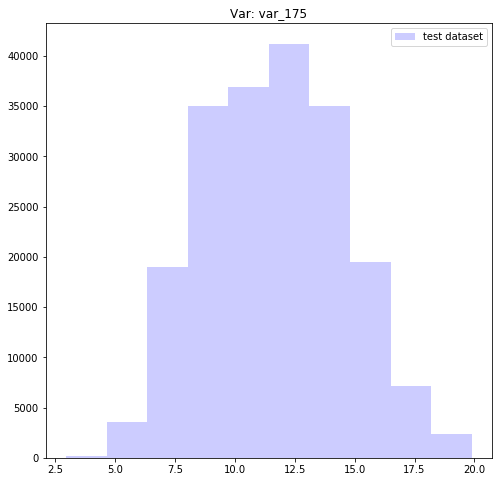

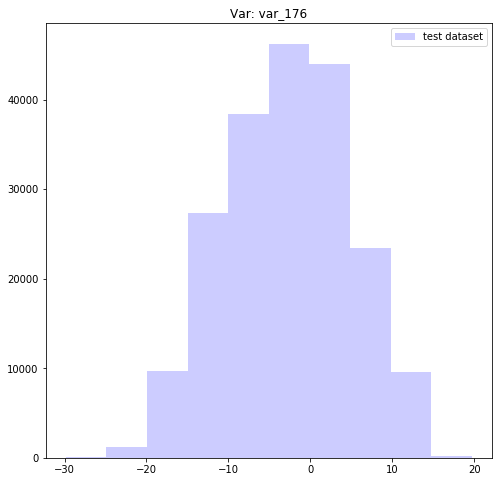

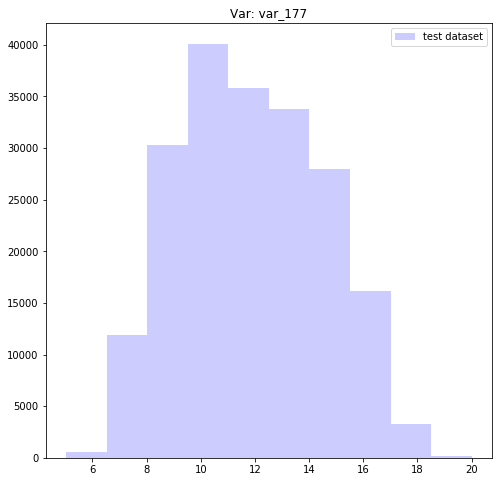

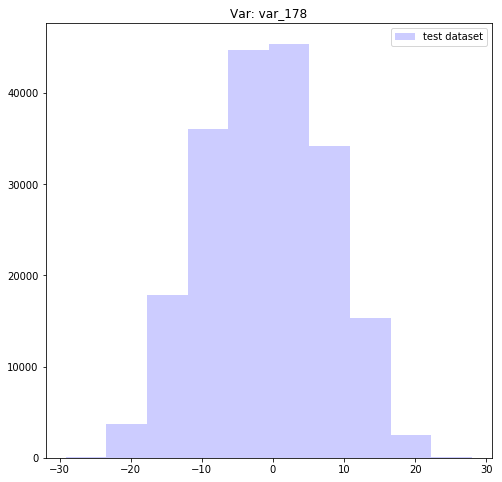

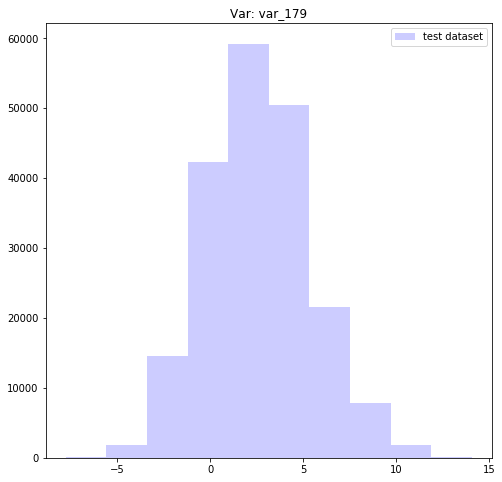

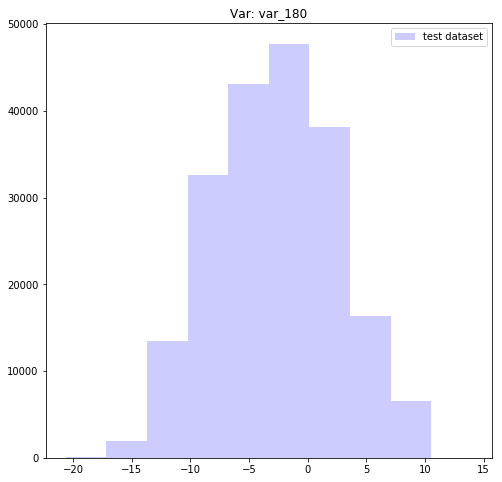

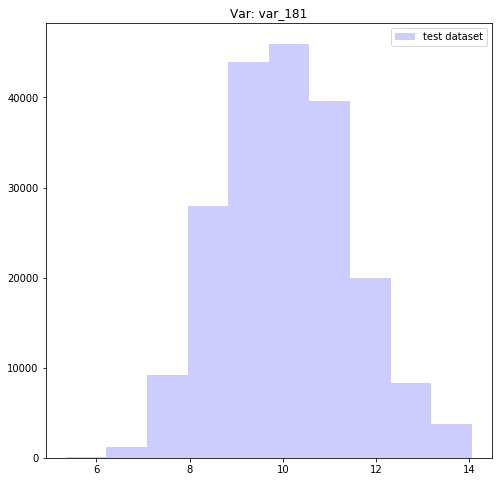

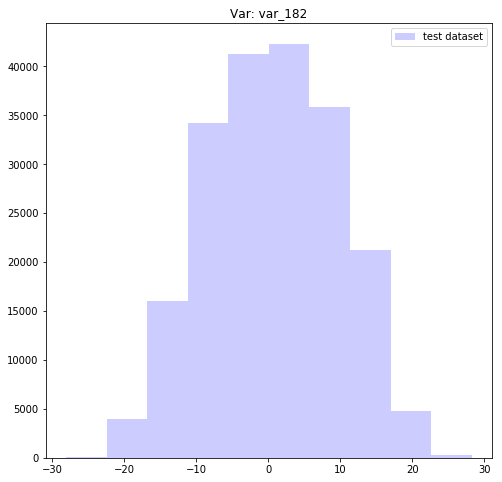

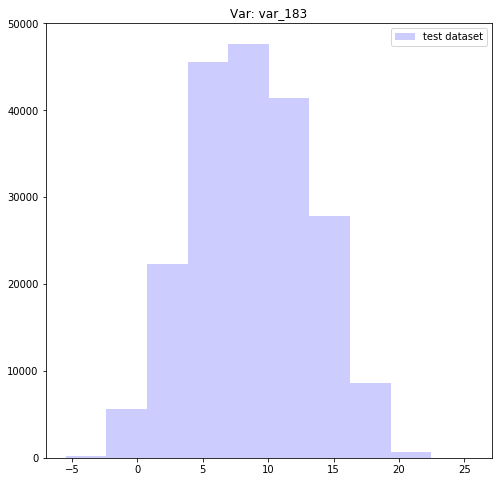

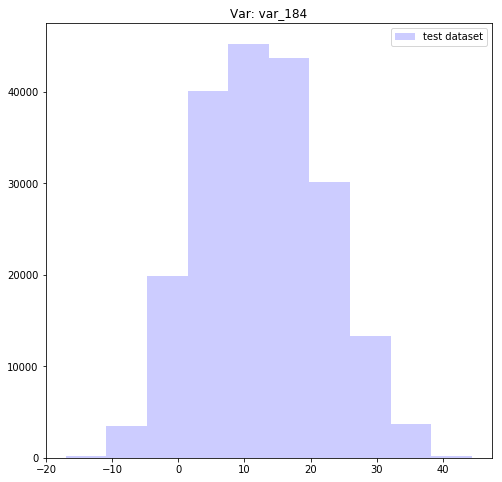

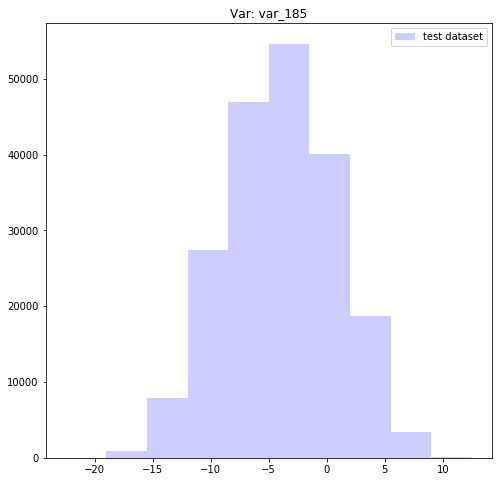

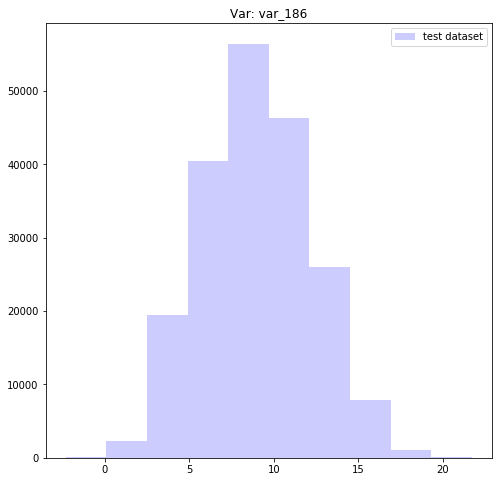

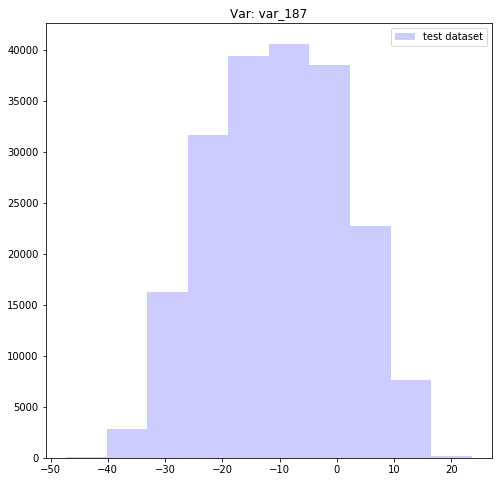

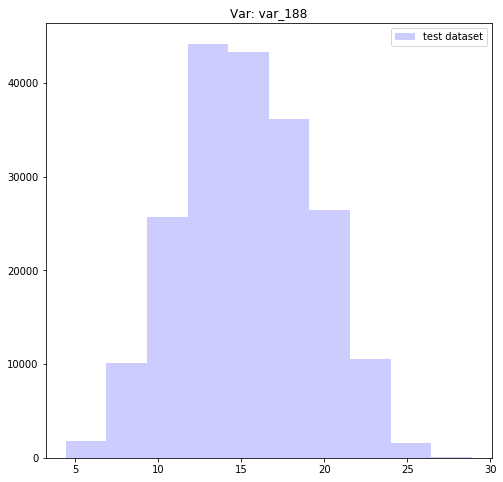

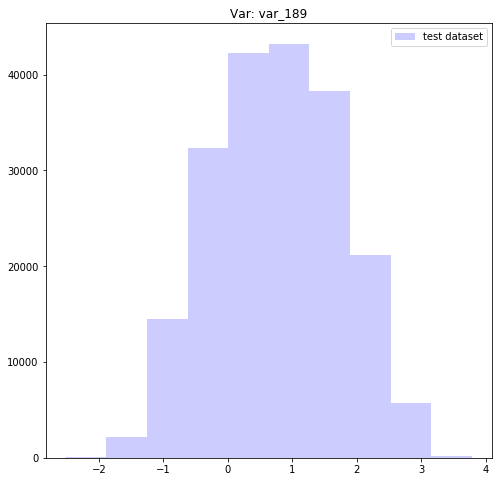

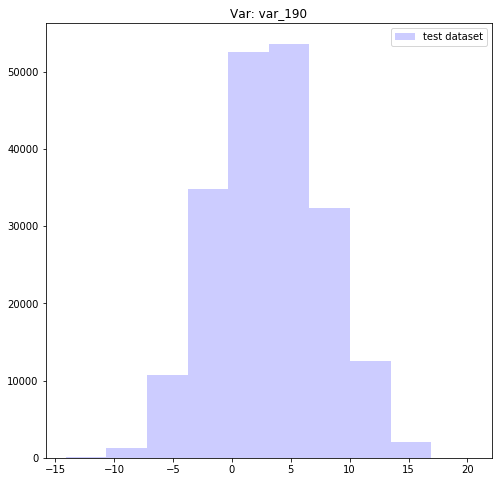

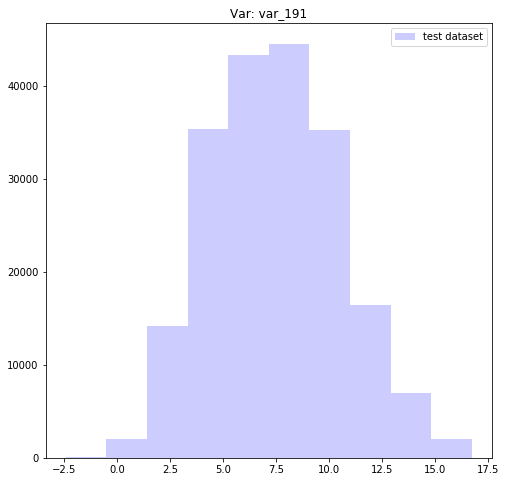

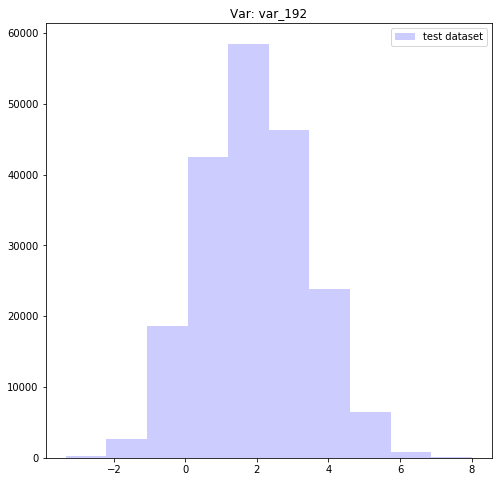

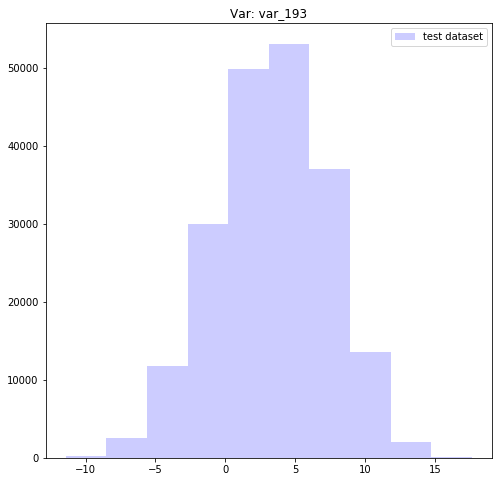

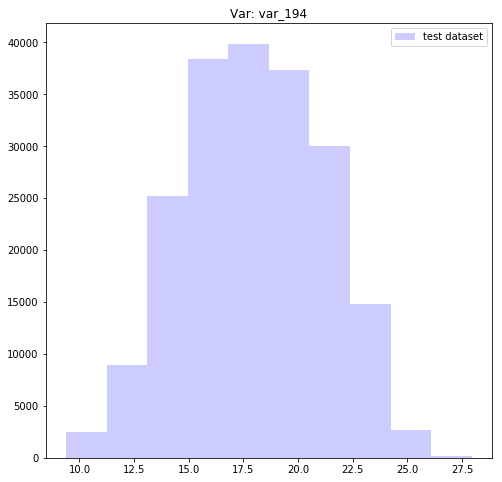

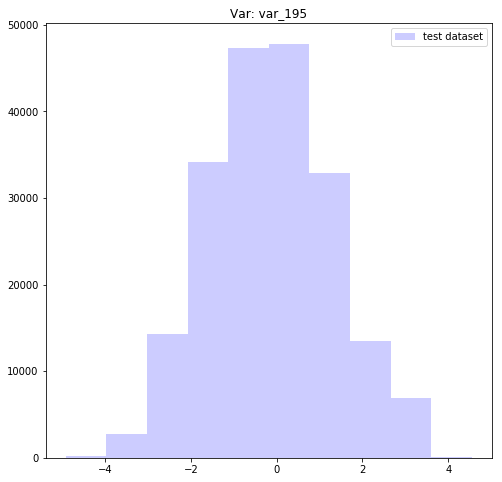

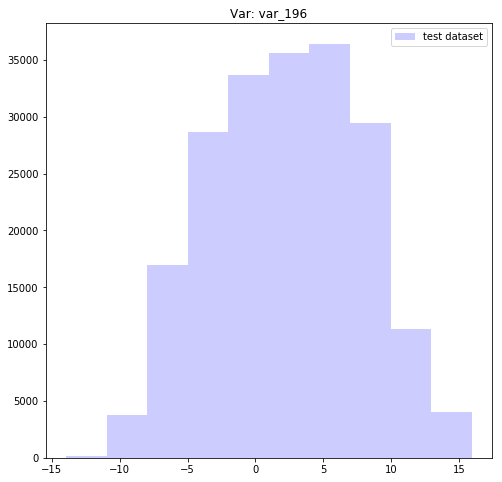

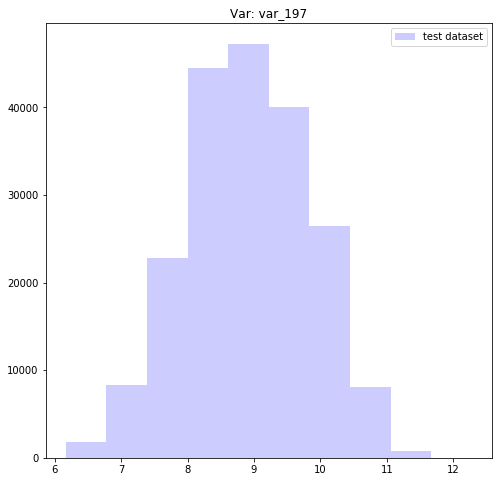

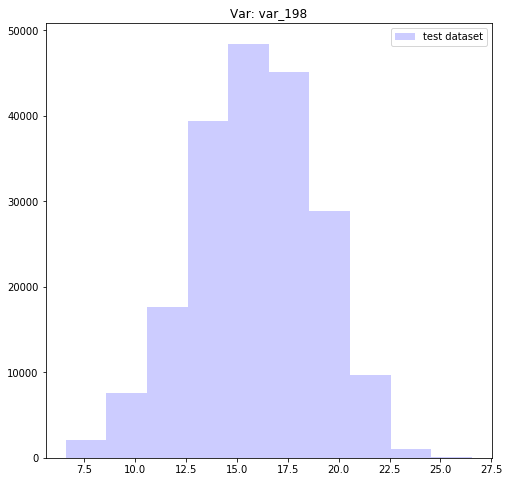

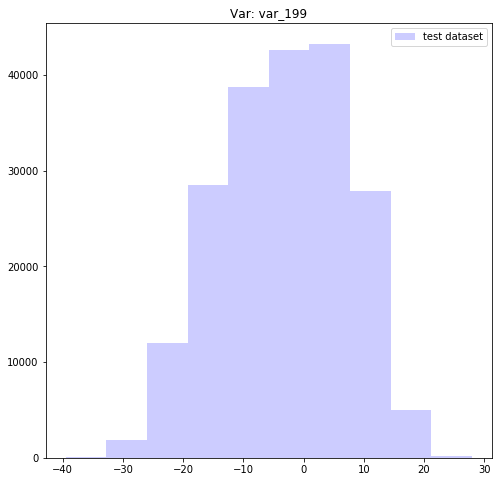

In [19]:
# is test dataset shifted?

for col in test_data.columns[3:]:
    df = test_data.loc[:, col]
    fig = plt.figure(figsize=  (8, 8))
    plt.title('Var: {}'.format(col))
    plt.hist(test_data.loc[:, col], alpha = 0.2, color ='blue', label = 'test dataset')
    plt.legend(loc = 'best')
    plt.show()
    #plt.savefig('.\plots\hists\test_{}.png'.format(col))
    plt.close()
    
    
    

In [5]:

# Wybor podzbioru 20% obserwacji 
# Dopasowanie do klasy mniejszosciowej 
# Przeliczenie modelu na walidacji krzyzowej 
# Zwrocenie modelu
np.random.seed(420)
# Let's sample minority class from train dataset
train_ones = train_data[train_data.target.values == 1]
train_zeros= train_data[train_data.target.values != 1]

# Save some pkls to file :
for rseed in range(10):
    np.random.seed(rseed)
    ones_id = np.random.choice(train_zeros.index, train_ones.shape[0])
    tmp_zeros = train_zeros.loc[ones_id, :]
    tmp_train = pd.concat([tmp_zeros, train_ones])
    tmp_train.to_pickle('data/pickles_tmp/tmp_train{}.pkl'.format(rseed))

In [ ]:
tmp_train.to_pickle('data/tmp_train.pkl')

In [ ]:
#!mkdir -p data\pickles_tmp

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
y = tmp_train.target.reset_index(drop=True)
X = tmp_train.drop('target', axis = 1)
X = tmp_train.drop('ID_code', axis = 1).reset_index(drop=True)

n_samples, n_features = X.shape
print("Liczba obserwacji \n {} \n Liczba czynnikow {}".format(X.shape[0], X.shape[1]))

cv = StratifiedKFold(n_splits=6)
classifier = RandomForestClassifier()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, thresholds = roc_curve(y.iloc[test], probas[:, 1])
    #https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print("iters auc {}".format(roc_auc))

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel': ('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC(gamma = 'scale')
clf = GridSearchCV(svc, parameters, cv = 12)
clf.fit(X, y)

In [7]:
for data in train_data.columns:
    print("unq \n {} \n  ======= {}  \n ".format(data, len(np.unique(train_data.loc[:, data]) )))

unq 
 ID_code 
  ======= 200000  
 
unq 
 target 
  ======= 2  
 
unq 
 var_0 
  ======= 94672  
 
unq 
 var_1 
  ======= 108932  
 
unq 
 var_2 
  ======= 86555  
 
unq 
 var_3 
  ======= 74597  
 
unq 
 var_4 
  ======= 63515  
 
unq 
 var_5 
  ======= 141029  
 
unq 
 var_6 
  ======= 38599  
 
unq 
 var_7 
  ======= 103063  
 
unq 
 var_8 
  ======= 98617  
 
unq 
 var_9 
  ======= 49417  
 
unq 
 var_10 
  ======= 128764  
 
unq 
 var_11 
  ======= 130193  
 
unq 
 var_12 
  ======= 9561  
 
unq 
 var_13 
  ======= 115181  
 
unq 
 var_14 
  ======= 79122  
 
unq 
 var_15 
  ======= 19810  
 
unq 
 var_16 
  ======= 86918  
 
unq 
 var_17 
  ======= 137823  
 
unq 
 var_18 
  ======= 139515  
 
unq 
 var_19 
  ======= 144180  
 
unq 
 var_20 
  ======= 127764  
 
unq 
 var_21 
  ======= 140062  
 
unq 
 var_22 
  ======= 90660  
 
unq 
 var_23 
  ======= 24913  
 
unq 
 var_24 
  ======= 105101  
 
unq 
 var_25 
  ======= 14853  
 
unq 
 var_26 
  ======= 127089  
 
unq 
 var_27 
